## Machine Learning
### House Prices: Advanced Regression Techniques

 #### Step 1 - Frame the problem and look at the big picture

##### 1.1  - Define the objective in business terms.

ans  - A prospective homebuyer considers many factors to decide a home to purchase. In other words, the price of a home depends on may 
factors. In this Kaggle competition, you are provided with 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

##### 1.2  - How should you frame this problem? (supervised/unsupervised, on-line/off-line, etc.)?

ans  - This is off-line, supervised learning Machine Learning task.
       This is also Regression problem because output is a continuous number.
       The solution will need advanced techniques because independent features is combination of continuous, ordinal and categorical data.
       
##### 1.3  - How should performance be measured?

ans  - Metric - Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.  (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.).  Therefore, it will be reasonable to use Mean Squared Error (MSE) to evaluate Machine Learning models. In addition, R-square (goodness of fit) will be used to evaluate a model.

 ### Step 2 - Setup

#### Common imports

In [1]:
# Start time for script
import time
start = time.time() # mark start of running whole kernel

# pandas / os etc.
import pandas as pd
from pandas import tseries, DataFrame
import scipy.stats as ss
import statsmodels.api as sm

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# To plot pretty figures
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set_style('dark', {'axes.facecolor' : 'lightgray'})

# for seaborn issue:
import warnings
warnings.filterwarnings('ignore')

# machine learning [Regression]
from sklearn.model_selection import (train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV, StratifiedKFold)
from sklearn.preprocessing import (MaxAbsScaler, PolynomialFeatures)
from sklearn import (preprocessing, clone)
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import (BayesianRidge, LinearRegression, Lasso, Ridge, ElasticNet, OrthogonalMatchingPursuit)
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from xgboost import XGBRegressor
# XGBoost installation instruction - Windows [simple] - https://www.ibm.com/developerworks/community/blogs/jfp/entry/Installing_XGBoost_For_Anaconda_on_Windows?lang=en

# to make this notebook's output stable across runs
np.random.seed(42)

C:\Users\vibas\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 3 - Get the data

In [2]:
# Manual method
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')
comb_data = pd.concat([train_data, test_data])
comb_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


### Step 4 - Explore the data (Discover and Visualize the data to gain insights)

In [3]:
# Find basic stats of number (continuous and ordinal) features
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Before going further in analysing the data set, it is very much required to see how the target variable(i.e SalePrice) is behaving. With behaving we mean:

- Distribution of SalePrice among various houses.
- What's the max, min and average saleprice?
- Visualise the SalePrice

In [4]:
_min = train_data['SalePrice'].min()
print("Min Selling Price is :",_min)
_avg = train_data['SalePrice'].mean()
print("Average Selling Price is : %10.2f " %_avg)
_median = train_data['SalePrice'].median()
print("Median Selling Price is :",_median)
_max = train_data['SalePrice'].max()
print("Max Selling Price is :",_max)

Min Selling Price is : 34900
Average Selling Price is :  180921.20 
Median Selling Price is : 163000.0
Max Selling Price is : 755000



Skewness: 1.882876

Kurtosis: 6.536282



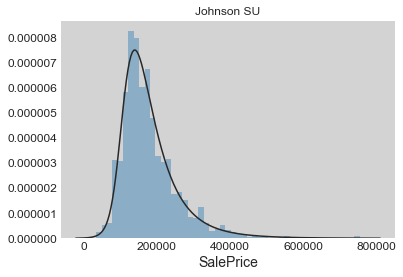

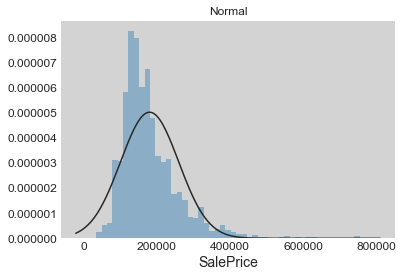

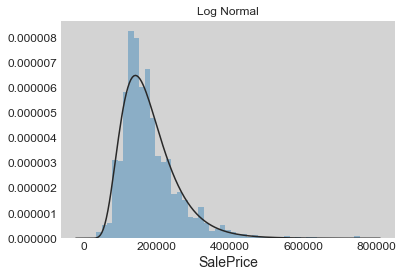

In [5]:
y = train_data['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=ss.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=ss.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=ss.lognorm)
# Skewness and Kurtosis
print()
print("Skewness: %f" % train_data['SalePrice'].skew())
print()
print("Kurtosis: %f" % train_data['SalePrice'].kurt())
print()

In [6]:
# Find data types and no. of data in each feature
train_data.info()
print("----------------------------------------------------")
test_data.info()
print("----------------------------------------------------")
comb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

*Note that categorical features are listed as 'object' data type and few categorical attributes are treated as numerical one. We need to clean these in next step.*

In [7]:
# Find columns with missing data
print("-------------Count of null values in Train Data------------------")
print(train_data.loc[:, train_data.isnull().any()].isnull().sum())
print("-------------Count of null values in Test Data-------------------")
print(test_data.loc[:, test_data.isnull().any()].isnull().sum())

-------------Count of null values in Train Data------------------
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
-------------Count of null values in Test Data-------------------
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu    

*There are few attributes with missing values. These need to be filled in next step, before applying ML models.*

*For exploration and to gain insight, we will use combind data, which includes both train and test data.*

*This process will guide data preparation strategy for Machine Learning models.*

*One way to select features is to find most important ones and apply ML models. However, we will follow an approach to start with features, identifying most important ones and dropping useless ones.*

#### Prepare data for analysis and visualization - Define preprocessing strategy

In [8]:
# Fill with median values [only columns in which missing values are very few]. There could be better way to fill columns with large no. of missing data.
for column_name in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'MasVnrArea', 'TotalBsmtSF',\
                   'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'MasVnrType', 'SaleType', 'Functional', 'KitchenQual']:
    comb_data[column_name].fillna(comb_data[column_name].value_counts().index[0], inplace=True)

In [9]:
print("-------------Count of null values in Comb Data------------------")
print(comb_data.loc[:, comb_data.isnull().any()].isnull().sum())

-------------Count of null values in Comb Data------------------
Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
Fence           2348
FireplaceQu     1420
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
LotFrontage      486
MiscFeature     2814
PoolQC          2909
SalePrice       1459
dtype: int64


*Features that can be dropped - Alley', 'Fence', 'MiscFeature', 'PoolQC' [>80% missing data]*

In [10]:
# After reading data dictionary, I concluded that many columns with categorical data which means 'Not' [like 'No Basement'] instead of 'NA' were converted to NaN by Pandas.
# Fill null values which means 'Not Present'
for column_name in ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',\
                   'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']:
    comb_data[column_name].fillna('Not', inplace=True)

In [11]:
# Find stats of remaining missing data
print(comb_data[['GarageYrBlt', 'LotFrontage']].describe().transpose())
print("-------------Count of null values in Comb Data------------------")
print(comb_data.loc[:, comb_data.isnull().any()].isnull().sum())

              count         mean        std     min     25%     50%     75%  \
GarageYrBlt  2760.0  1978.113406  25.574285  1895.0  1960.0  1979.0  2002.0   
LotFrontage  2433.0    69.305795  23.344905    21.0    59.0    68.0    80.0   

                max  
GarageYrBlt  2207.0  
LotFrontage   313.0  
-------------Count of null values in Comb Data------------------
GarageYrBlt     159
LotFrontage     486
SalePrice      1459
dtype: int64


In [12]:
# Find correlation in other columns
print("-------------Count of null 'GarageYrBlt' and 'No Garage' in Comb Data------------------")
print(comb_data['GarageYrBlt'][(comb_data['GarageYrBlt'].isnull()) & (comb_data['GarageType'] == 'Not')].isnull().sum())

-------------Count of null 'GarageYrBlt' and 'No Garage' in Comb Data------------------
157


It shows that null values in 'GarageYrBlt' mean houses without garage. I am filling with 1900 to imply less value than others with garage.

In [13]:
# Fill null 'GarageYrBlt' values with 1900.
for column_name in ['GarageYrBlt']:
    comb_data[column_name].fillna(1900, inplace=True)

It is not clear what null values in 'LotFrontage' mean. So, I am going to fill it random values.

In [14]:
#comb_data.LotFrontage[np.isnan(comb_data.LotFrontage)]

In [15]:
# Fill missing 'LotFrontage' with random numbers
#comb_data.LotFrontage[np.isnan(comb_data.LotFrontage)] = np.random.normal(comb_data.LotFrontage.mean(), comb_data.LotFrontage.std(), np.isnan(comb_data.LotFrontage).sum())

In [16]:
comb_data.LotFrontage[np.isnan(comb_data.LotFrontage)] = round(comb_data['LotFrontage'].mean(),0)

In [17]:
comb_data.LotFrontage[np.isnan(comb_data.LotFrontage)]

Series([], Name: LotFrontage, dtype: float64)

In [18]:
# Confirm - Find stats of remaining missing data
print(comb_data[['GarageYrBlt', 'LotFrontage']].describe().transpose())
print("-------------Count of null values in Comb Data------------------")
print(comb_data.loc[:, comb_data.isnull().any()].isnull().sum())

              count         mean        std     min     25%     50%     75%  \
GarageYrBlt  2919.0  1973.858513  30.541338  1895.0  1957.0  1977.0  2001.0   
LotFrontage  2919.0    69.254882  21.312650    21.0    60.0    69.0    78.0   

                max  
GarageYrBlt  2207.0  
LotFrontage   313.0  
-------------Count of null values in Comb Data------------------
SalePrice    1459
dtype: int64


In [19]:
# Change categorical columns to category data type [By default, Pandas converted these columns to 'Object']
for column_name in comb_data.select_dtypes(include=['object']).columns:
    comb_data[column_name] = comb_data[column_name].astype('category')    
comb_data.dtypes

1stFlrSF            int64
2ndFlrSF            int64
3SsnPorch           int64
Alley            category
BedroomAbvGr        int64
BldgType         category
BsmtCond         category
BsmtExposure     category
BsmtFinSF1        float64
BsmtFinSF2        float64
BsmtFinType1     category
BsmtFinType2     category
BsmtFullBath      float64
BsmtHalfBath      float64
BsmtQual         category
BsmtUnfSF         float64
CentralAir       category
Condition1       category
Condition2       category
Electrical       category
EnclosedPorch       int64
ExterCond        category
ExterQual        category
Exterior1st      category
Exterior2nd      category
Fence            category
FireplaceQu      category
Fireplaces          int64
Foundation       category
FullBath            int64
                   ...   
LotShape         category
LowQualFinSF        int64
MSSubClass          int64
MSZoning         category
MasVnrArea        float64
MasVnrType       category
MiscFeature      category
MiscVal     

**Visualize numerical features**

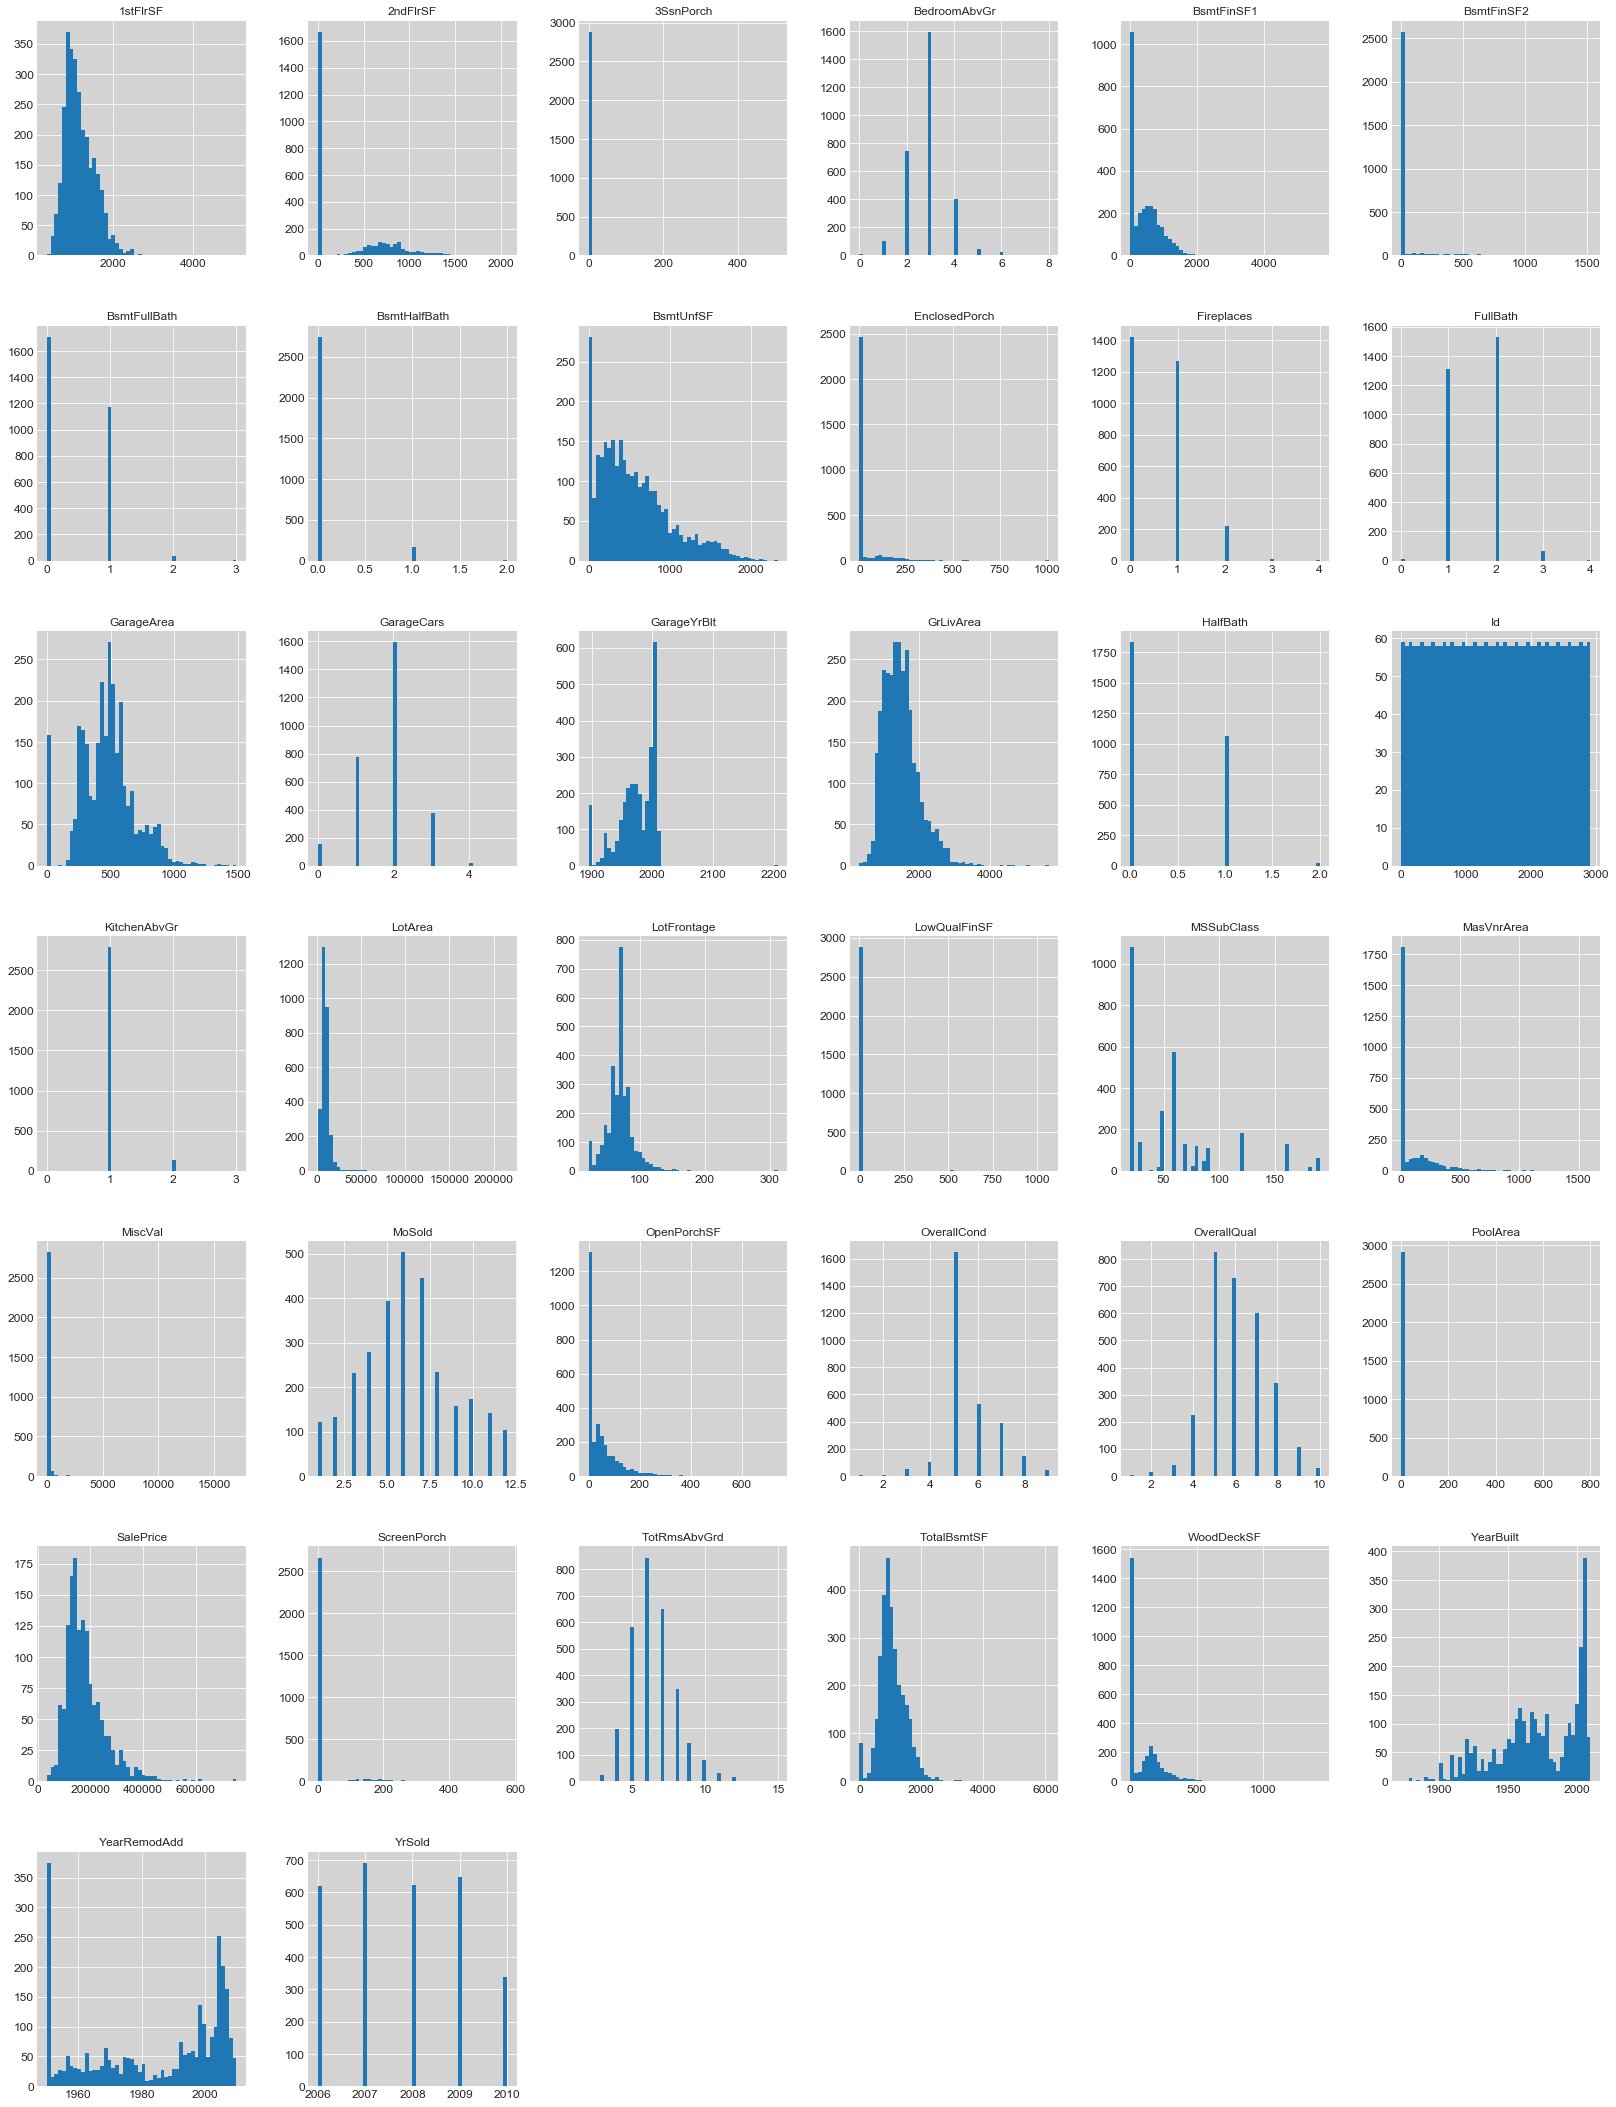

In [20]:
# Histograms and Scatter plots are quick way to visulalize numerical features
# Plot histograms for ordianl and continuos variables
comb_data.select_dtypes(include=[np.number]).hist(bins=50, figsize=(28, 38))
plt.show()

'SalePrice' is right-skewed normal distribution. So, all features with similar distribution along with high correlation coefficient with 'SalePrice' are strong features for this exercise.

Strong features - '1stFlrSF', 'BsmtUnfSF', 'GarageArea', 'GrLivArea', 'LotFrontage', 'MoSold', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'TotRmsAbvGrd', 'YearRemodAdd'

[However, we have to look at other stats too.]

On the other hand, a feature with counts in value significantly higher will not be a good feature, and can be safely dropped.

Additional features that can be dropped - '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'EnclosedPorch', 'KitchenAbvGr', 'LowQualFinSF', 'PoolArea', 'ScreenPorch'*

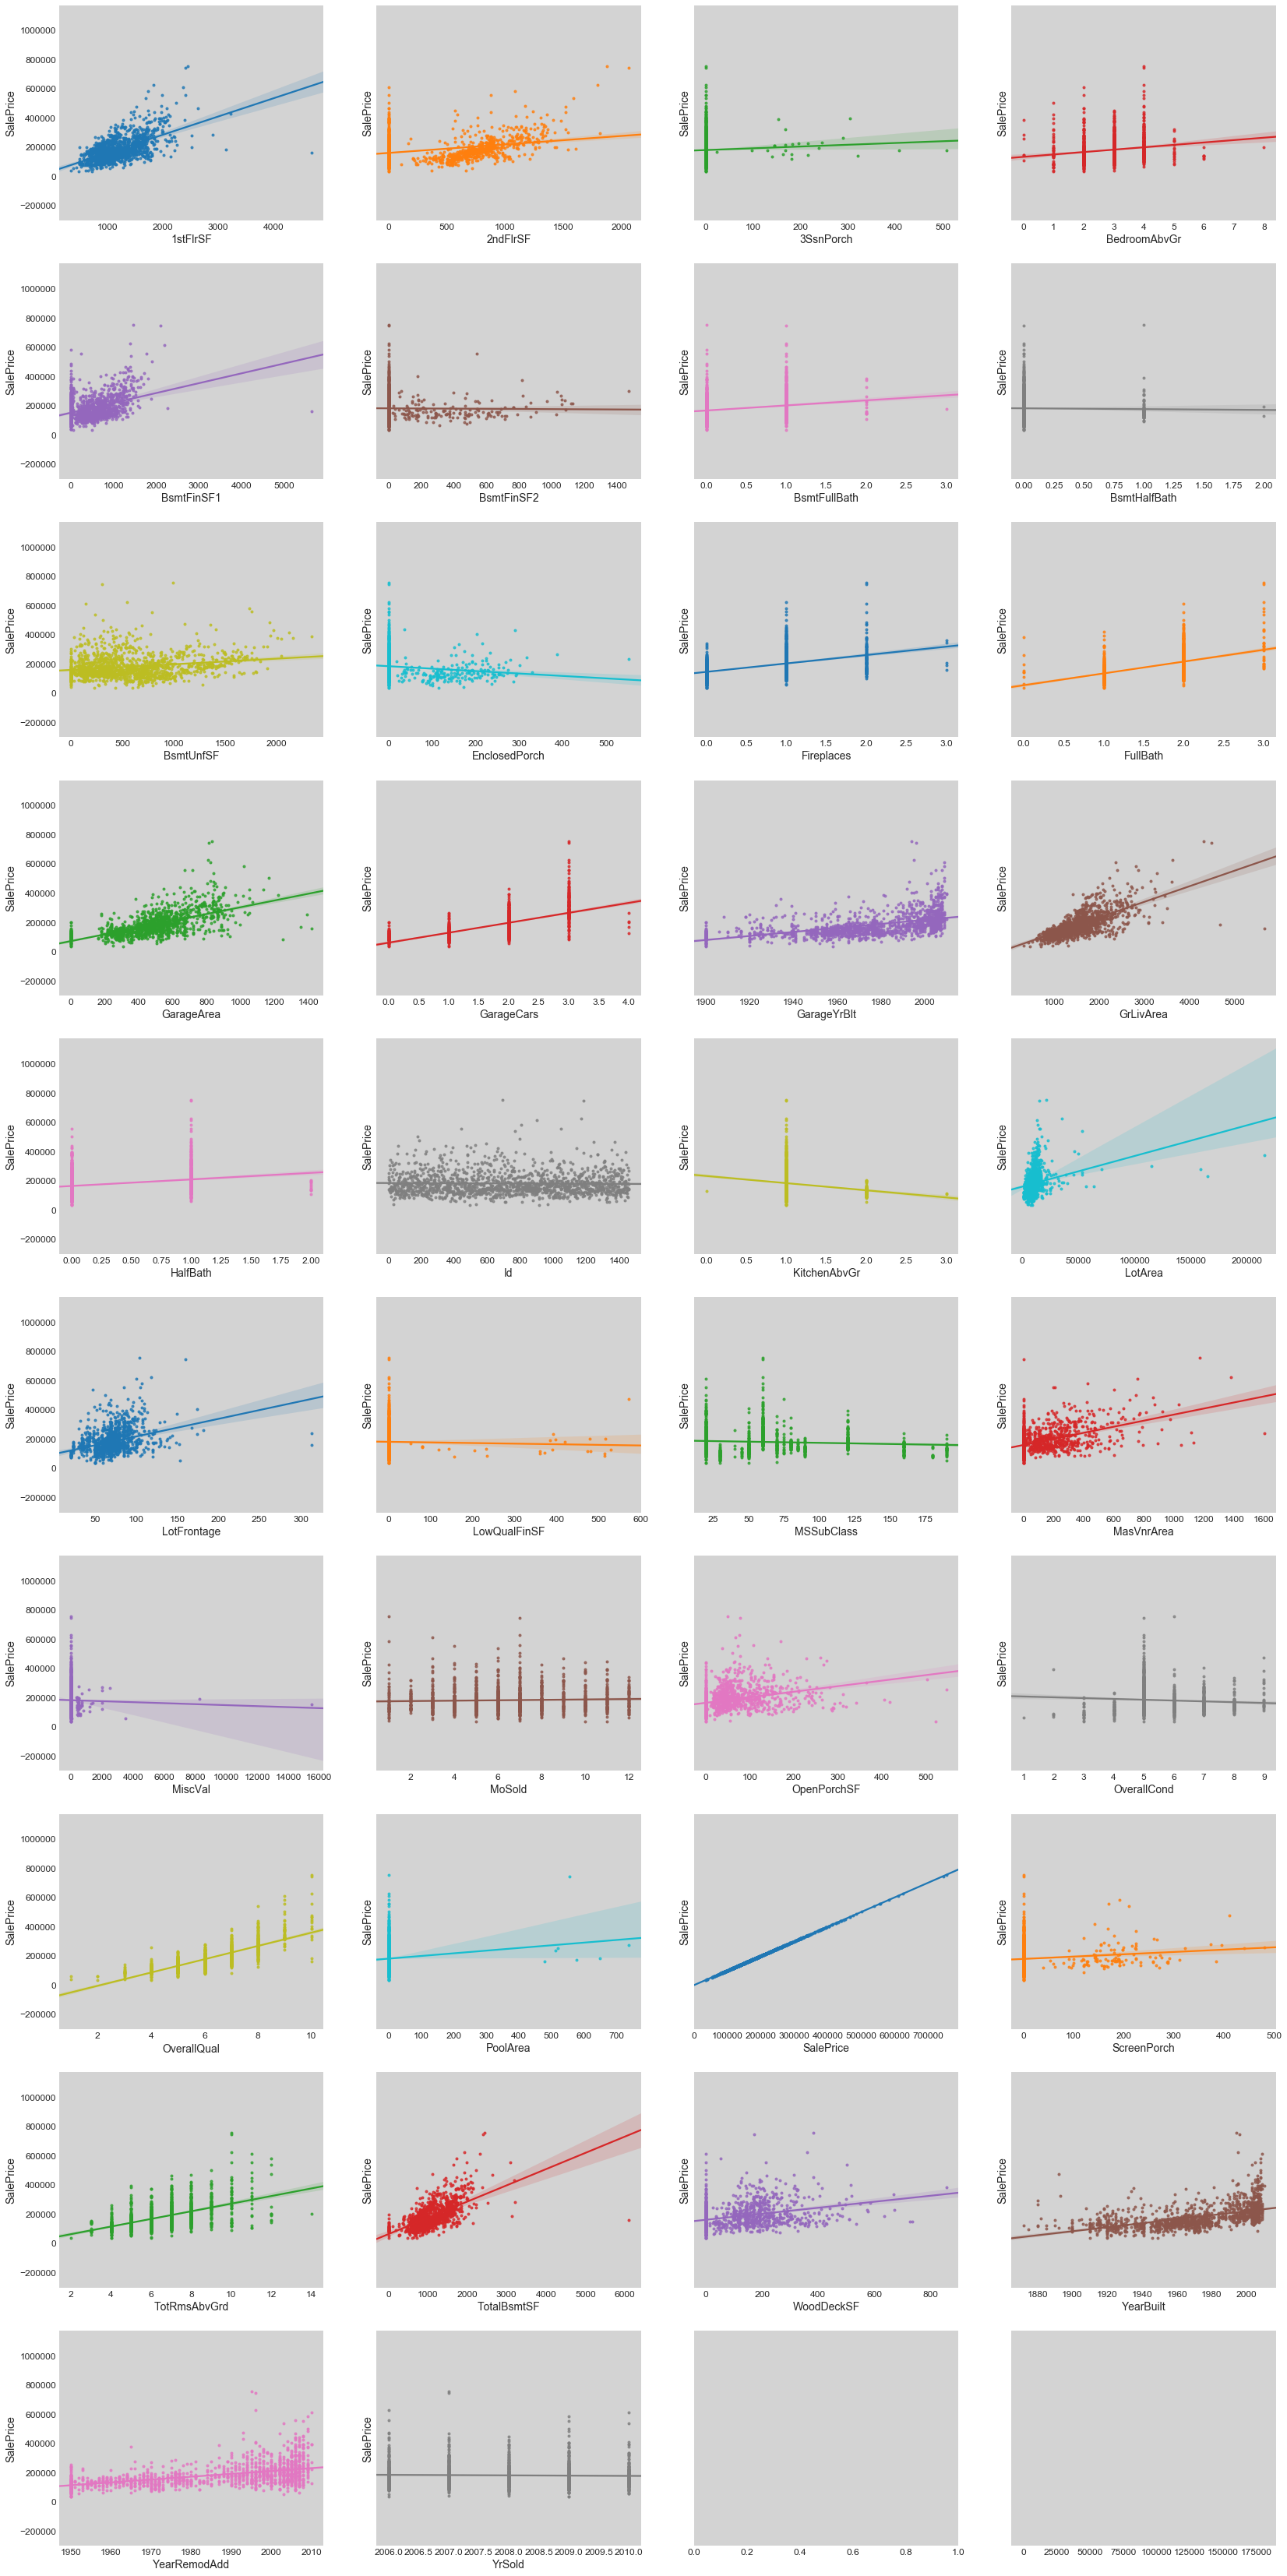

In [21]:
# Plot data and a linear regression model fit.
# Let us see how number columns look against 'SalePrice', which is target variable of this exercise.
f, axes = plt.subplots(10,4, figsize = (28, 60), sharey=True)
for i, col_name in enumerate(comb_data.select_dtypes(include=[np.number]).columns):
    row = i // 4
    col = i % 4
    ax_curr = axes[row, col]
    sns.regplot(x=col_name, y='SalePrice', data=comb_data, scatter=True, marker = '.', ax = ax_curr)
plt.show()

*A flat regression line means, 'SalePrice' does not vary across values of X variable in the plot.
As expected, most features identified to be dropped above look flat.
Additional features that can be dropped - 'BsmtUnfSF', 'Id', 'MoSold', 'MiscVal', 'OverallCond', 'YearRemodAdd', 'YrSold'.
'MSSubClass' maybe important when converted to categorical feature.
Also, plot with data points scattered in one corner means variables with outliers.*

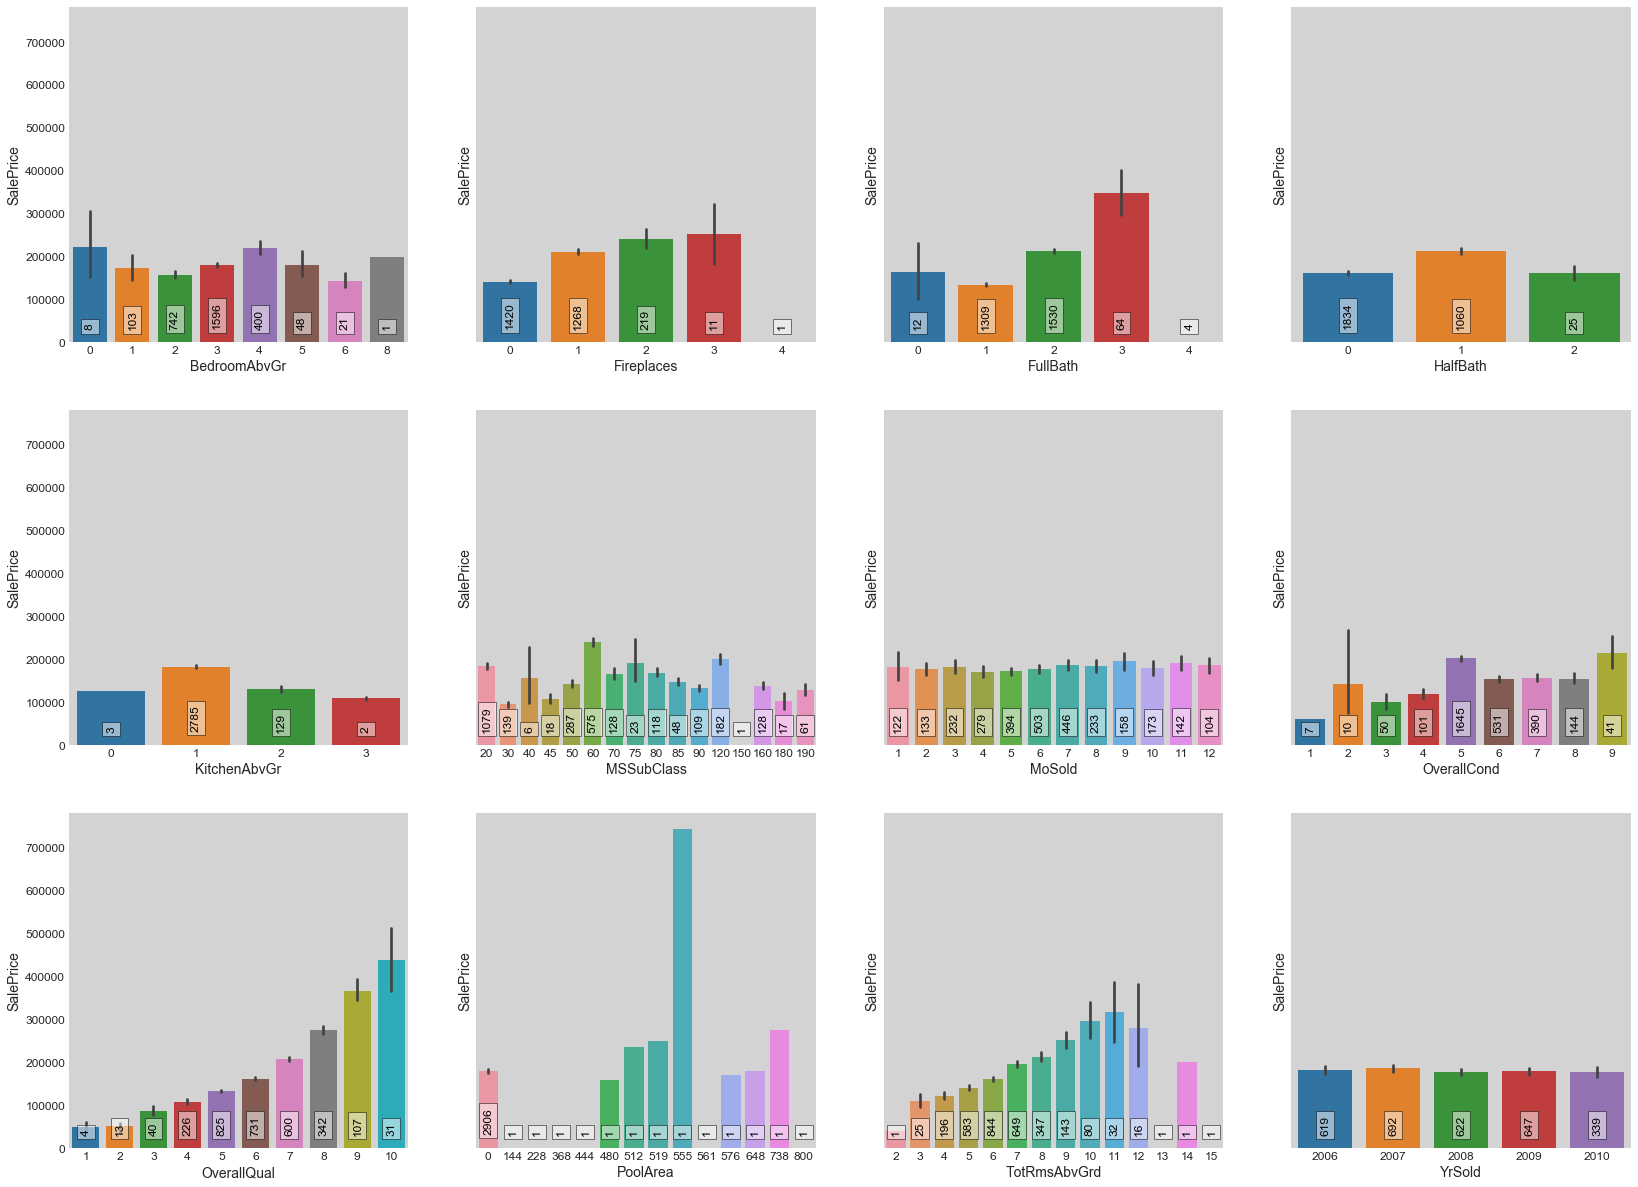

In [22]:
# As obeserved above, there are many features with ordinal categories. Let us try a better visualization for these features.
# Plot columns with ordinal categories columns with Mean 'SalePrice' on Y axis and count of observations in each category [Shown in box]
f, axes = plt.subplots(3,4, figsize = (28, 21), sharey=True)
for i, col_name in enumerate(comb_data.ix[:, comb_data.apply(lambda x: x.nunique()) < 20].select_dtypes(include=['int64']).columns):
    row = i // 4
    col = i % 4
    ax_curr = axes[row, col]    
    ax = sns.countplot(x=col_name, data=comb_data, ax = ax_curr)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 30000, '{:1.0f}'.format(height), ha="center", va="bottom", size=12, color='black', bbox=dict(facecolor='white', alpha=0.5), rotation=90)
    sns.barplot(col_name, 'SalePrice', data=comb_data, ax = ax_curr)
plt.show()

*Plots above explain why feature like 'BedroomAbvGr' do not explain variation in 'SalePrice'.
No additional column can be identified that can be dropped. However, it confirms why few columns can be dropped.
Plot of 'OverallQual' looks really nice and stands out.*

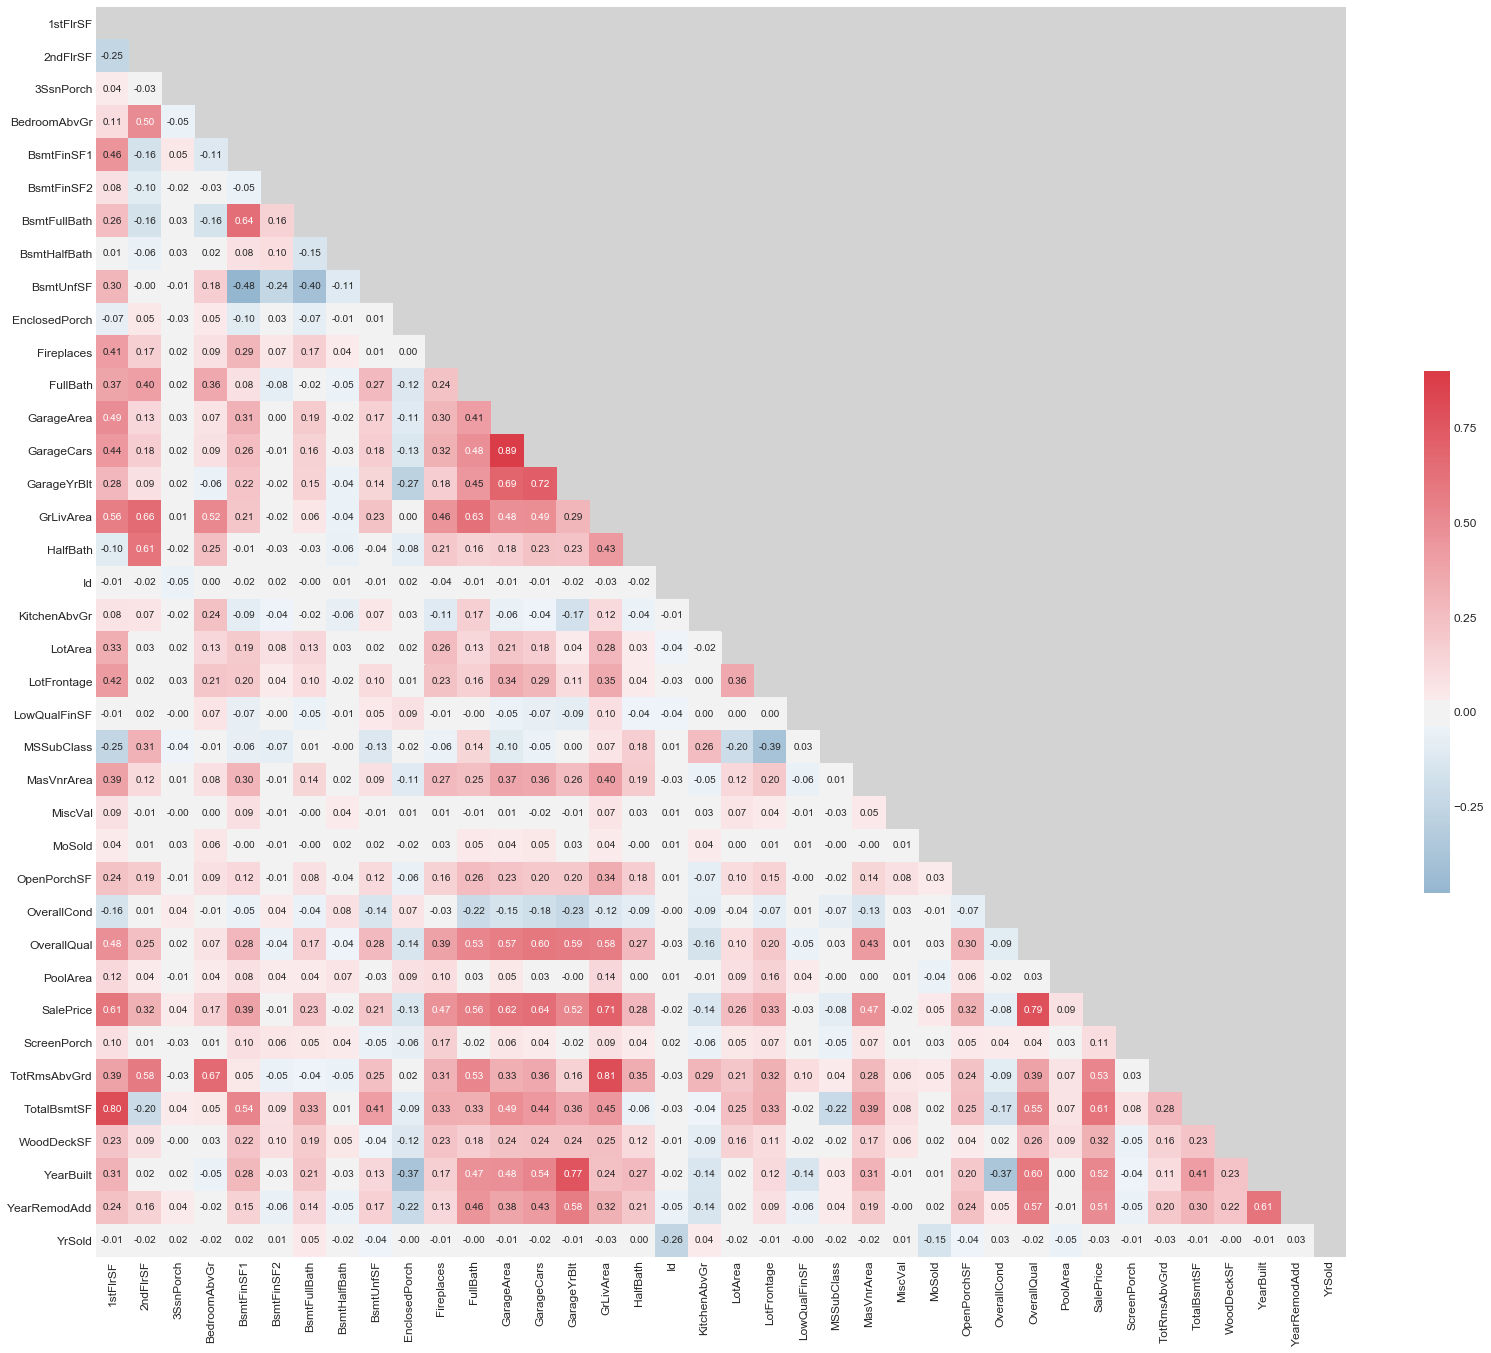

In [23]:
# Find if a column can be explained by other column, i.e. highly dependent (correlated)
# Drawing correlation matris - Standard Pearson coefficients
# Compute the correlation matrix
corr_mat = comb_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 24))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.9, center=0, square=True, annot=True, linecolor='black', linewidths=0, cbar_kws={"shrink": .4}, fmt='.2f')
plt.show()

*All features with most cells close to white, specially against 'SalePrice', can be dropped - like 'Id', 'YrSold', 'MoSold' 
It also shows one column from a pair can be dropped if values are too high.
e.g. 'GarageCars' and 'GarageArea' has corr. coeff. = 0.89. Their corr. coeff. are 0.64 and 0.62 with 'SalePrice' respectively. I would prefer continuos data, so will drop 'GarageCars'.
Additional features that can be dropped - 'GarageCars', 'TotRmsAbvGrd', '1stFlrSF'*

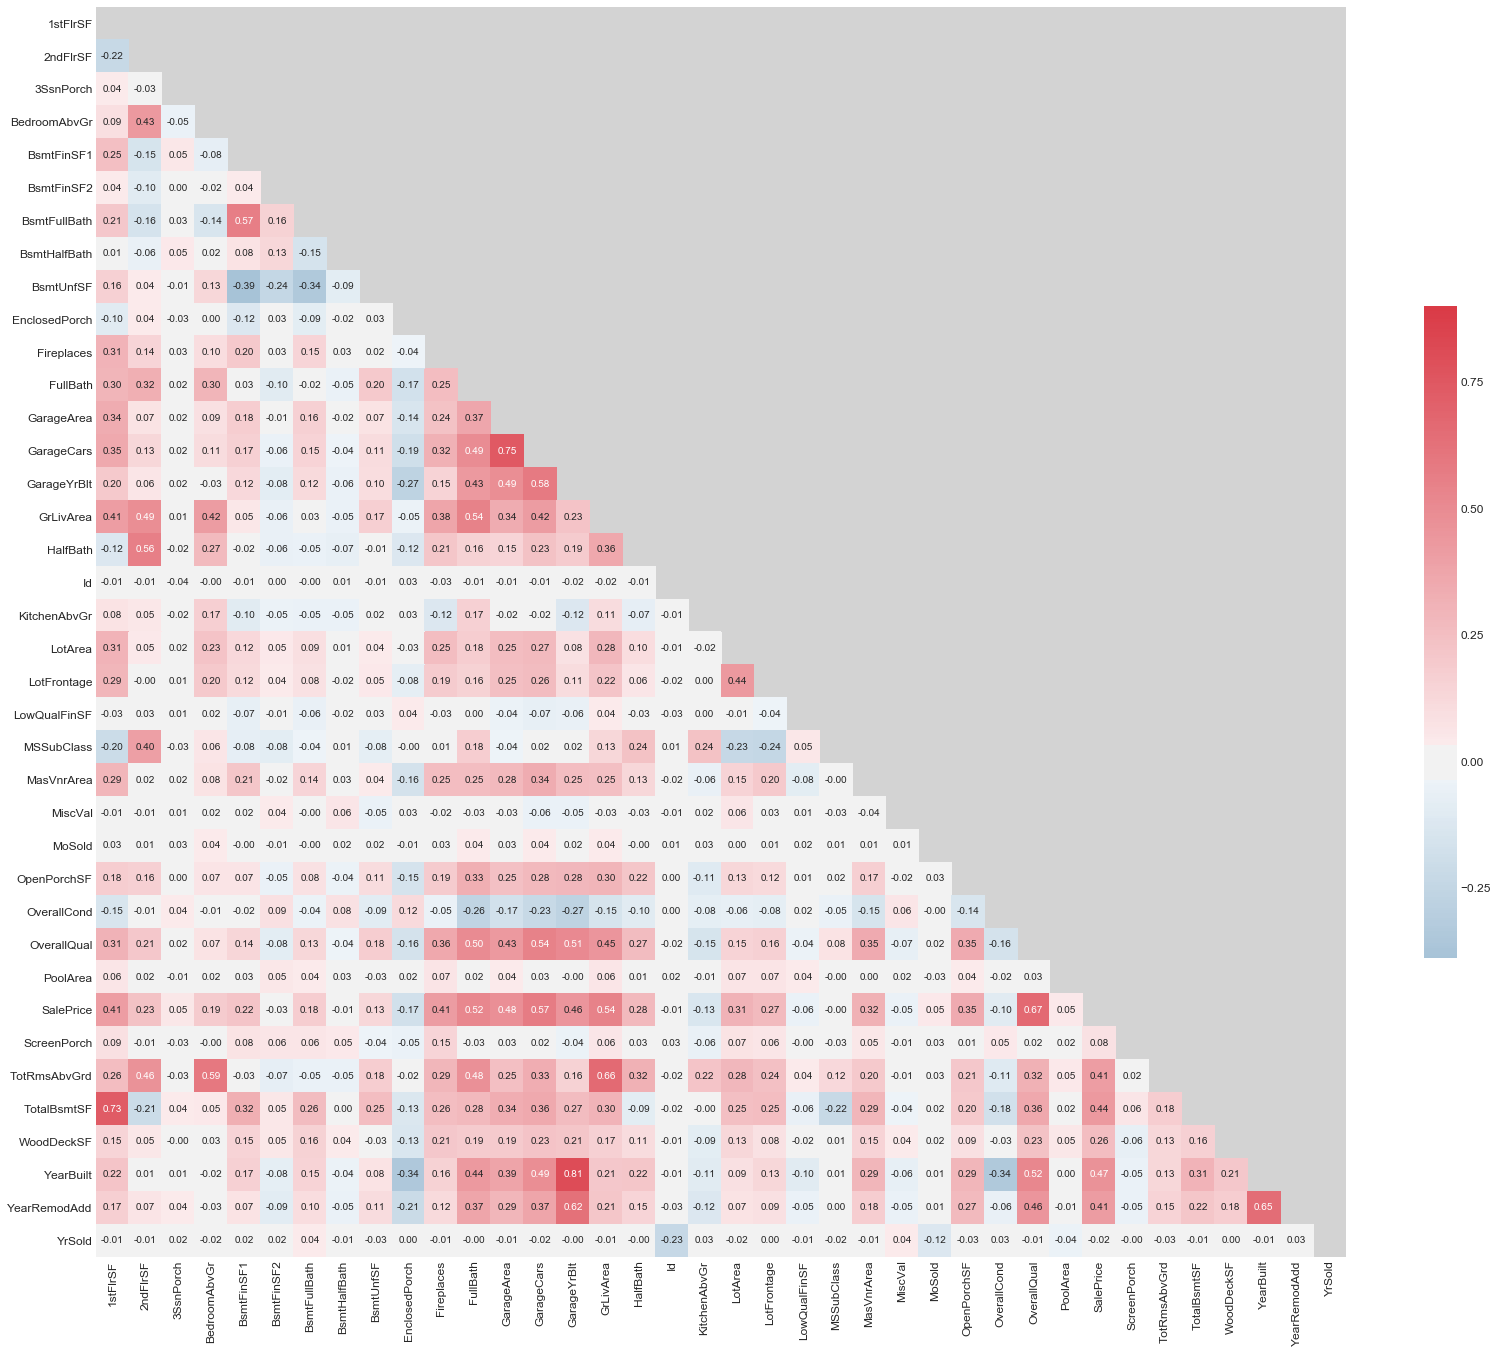

In [24]:
# Drawing correlation matris - Kendall's Tau coefficient
# Compute the correlation matrix
corr_mat = comb_data.corr(method='kendall')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 24))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.9, center=0, square=True, annot=True, linecolor='black', linewidths=0, cbar_kws={"shrink": .5}, fmt='.2f')
plt.show()

**Visualize categorical features**

In [25]:
# Find categorical features that are being represented as ordinal feature
# Change categorical columns to category data type
for column_name in ['MSSubClass', 'YrSold']:
    comb_data[column_name] = comb_data[column_name].astype('category')

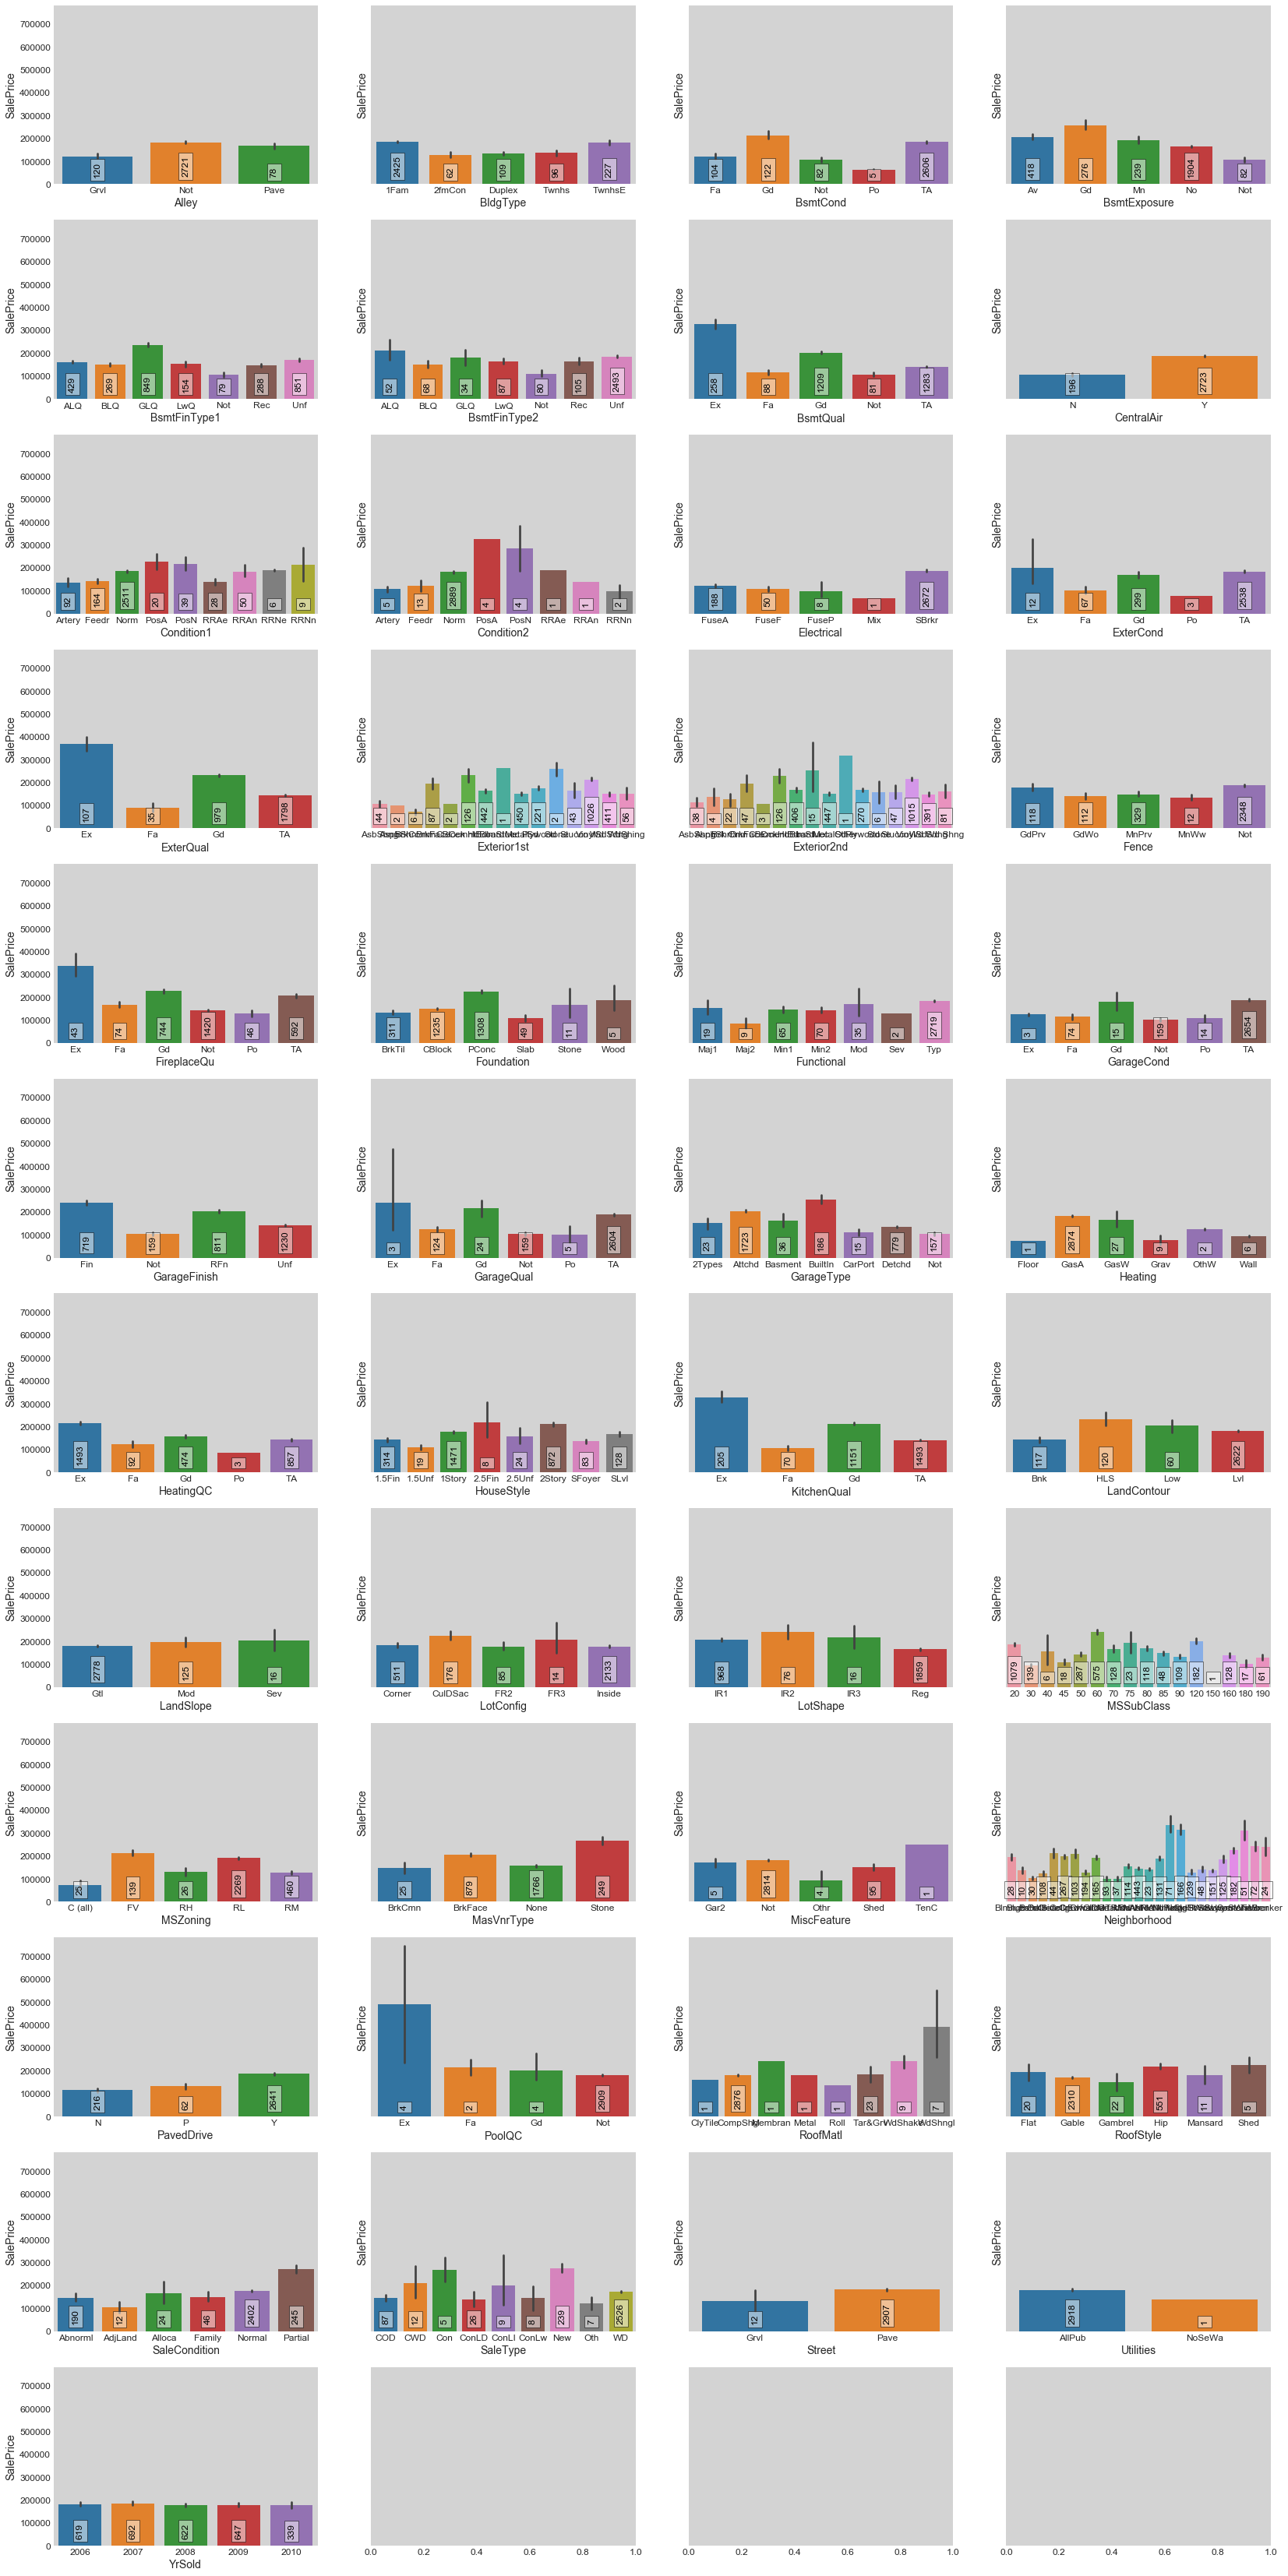

In [26]:
# Plot categorical variables Barplot with Mean 'SalePrice' on Y axis and count of observations in each category [Shown in box]
f, axes = plt.subplots(12,4, figsize = (28, 60), sharey=True)
for i, col_name in enumerate(comb_data.select_dtypes(include=['category']).columns):
    row = i // 4
    col = i % 4
    ax_curr = axes[row, col]    
    ax = sns.countplot(x=col_name, data=comb_data, ax = ax_curr)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 30000, '{:1.0f}'.format(height), ha="center", va="bottom", size=12, color='black', bbox=dict(facecolor='white', alpha=0.5), rotation=90)
    sns.barplot(col_name, 'SalePrice', data=comb_data, ax = ax_curr)
plt.show()

*A categorical feature with counts in value significantly higher will not be a good feature, and can be safely dropped.
Additional features that can be dropped - 'Alley', 'BldgType', 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'Fence', 'Functional'
'GarageCond', 'GarageQual', 'Heating', 'LotConfig', 'LandContour', 'LandSlope', 'MiscFeature', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleType', 'Street', 'Utilities'.
These columns won't be useful in analysis and prediction as most of values fall in one category or Median 'SalePrice' remains flat.
Note - 'MSSubClass' as categorical feature looks promising, however as ordinal feature showed no slope against 'SalePrice', hence we decided to drop earlier.
However, 'YrSold' remained flat.*

##### Cramer's V Score - It is used as post-test to determine strengths of association after chi-square has determined significance.

##### Cramer's V Score

Association refers to coefficients which gauge the strength of a relationship. Coefficients in this section are designed for use with nominal data. Phi and Cramer's V are based on adjusting chi-square significance to factor out sample size.

In [27]:
# Caluculate assciation between 2 categorical columns - Cramer's V score
for i in comb_data.select_dtypes(include=['category']).columns:
    col_1 = i
    for j in comb_data.select_dtypes(include=['category']).columns:
        col_2 = j
        if col_1 == col_2:
            break
        confusion_matrix = pd.crosstab(comb_data[col_1], comb_data[col_2])
        chi2 = ss.chi2_contingency(confusion_matrix)[0] # import scipy.stats as ss
        n = confusion_matrix.sum().sum()
        phi2 = chi2/n
        r,k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        Cramer_V = np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
        if Cramer_V > 0.7:
            print("The Cramer's V score bettween " + col_1 + " and " + col_2 + " is : " + str(Cramer_V))
        result = Cramer_V

The Cramer's V score bettween Exterior2nd and Exterior1st is : 0.719752685534
The Cramer's V score bettween MSSubClass and BldgType is : 0.890866202465
The Cramer's V score bettween MSSubClass and HouseStyle is : 0.829611592243


*No Result above means no combination of two columns has Cramer's V score < 0.7 
Cramer's V score > 0.7, one column can be dropped.
Additional features that can be dropped - 'Exterior2nd', 'BldgType', 'HouseStyle'.*

**Find and delete rows with outlier data**

In [28]:
def outliers_iqr(df, columns_for_outliers):
    for column_name in columns_for_outliers:
        if not 'Outlier' in df.columns:
            df['Outlier'] = 0
        q_75, q_25 = np.percentile(df[column_name], [75 ,25])
        iqr = q_75 - q_25
        minm = q_25 - (iqr*1.75)
        maxm = q_75 + (iqr*1.75)        
        df['Outlier'] = np.where(df[column_name] > maxm, 1, np.where(df[column_name] < minm, 1, df['Outlier']))

In [29]:
# Drop rows with outlier data
columns_for_outliers = ['YearBuilt', 'GrLivArea', 'TotalBsmtSF', 'Fireplaces', 'GarageArea', 'LotArea']
outliers_iqr(comb_data, columns_for_outliers)
print('Total ' + str(comb_data.Outlier.sum()) + ' rows with outliers from comb_data were deleted')
comb_data = comb_data[comb_data.Outlier != 1]
comb_data = comb_data.drop(['Outlier'], axis=1)

Total 181 rows with outliers from comb_data were deleted


**Creating derived features**

In [30]:
# Create new columns, MasVnr - Y or N, OpenPorch - Y or N
comb_data['MasVnr'] = np.where(comb_data['MasVnrArea'] == 0, 0, 1)
comb_data['OpenPorch'] = np.where(comb_data['OpenPorchSF'] == 0, 0, 1)

# Change to category data type
for column_name in ['MasVnr', 'OpenPorch']:
    comb_data[column_name] = comb_data[column_name].astype('category')

# Create another column of Total bathrooms
comb_data['TotalBath'] = pd.to_numeric(comb_data.BsmtFullBath + comb_data.BsmtHalfBath*0.5 + comb_data.FullBath + comb_data.HalfBath*0.5)

*Additional features that can be dropped as per this step - 'MasVnrArea', 'OpenPorchSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'.

**Delete unnecessary columns**

In [31]:
# Drop unnecessary columns, these columns won't be useful in analysis and prediction
comb_data = comb_data.drop(['3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'EnclosedPorch', 'KitchenAbvGr', 'LowQualFinSF', 'MiscVal', 'PoolArea', 'ScreenPorch',\
'BsmtUnfSF', 'Id', 'MoSold', 'OverallCond', 'YearRemodAdd', 'YrSold', 'BedroomAbvGr', 'BsmtFullBath',  'GarageCars',\
'TotRmsAbvGrd', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'Alley', 'BldgType', 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'Condition1', 'Condition2',\
'Electrical', 'Fence', 'ExterCond', 'Functional', 'GarageCond', 'GarageQual', 'Heating', 'LotConfig', 'LandContour', 'LandSlope',\
'MiscFeature', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleType', 'Street', 'Utilities', 'Exterior2nd', 'HouseStyle',\
'MasVnrArea', 'OpenPorchSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)

**Check if rest of columns looks OK from data preprocessing strategy **

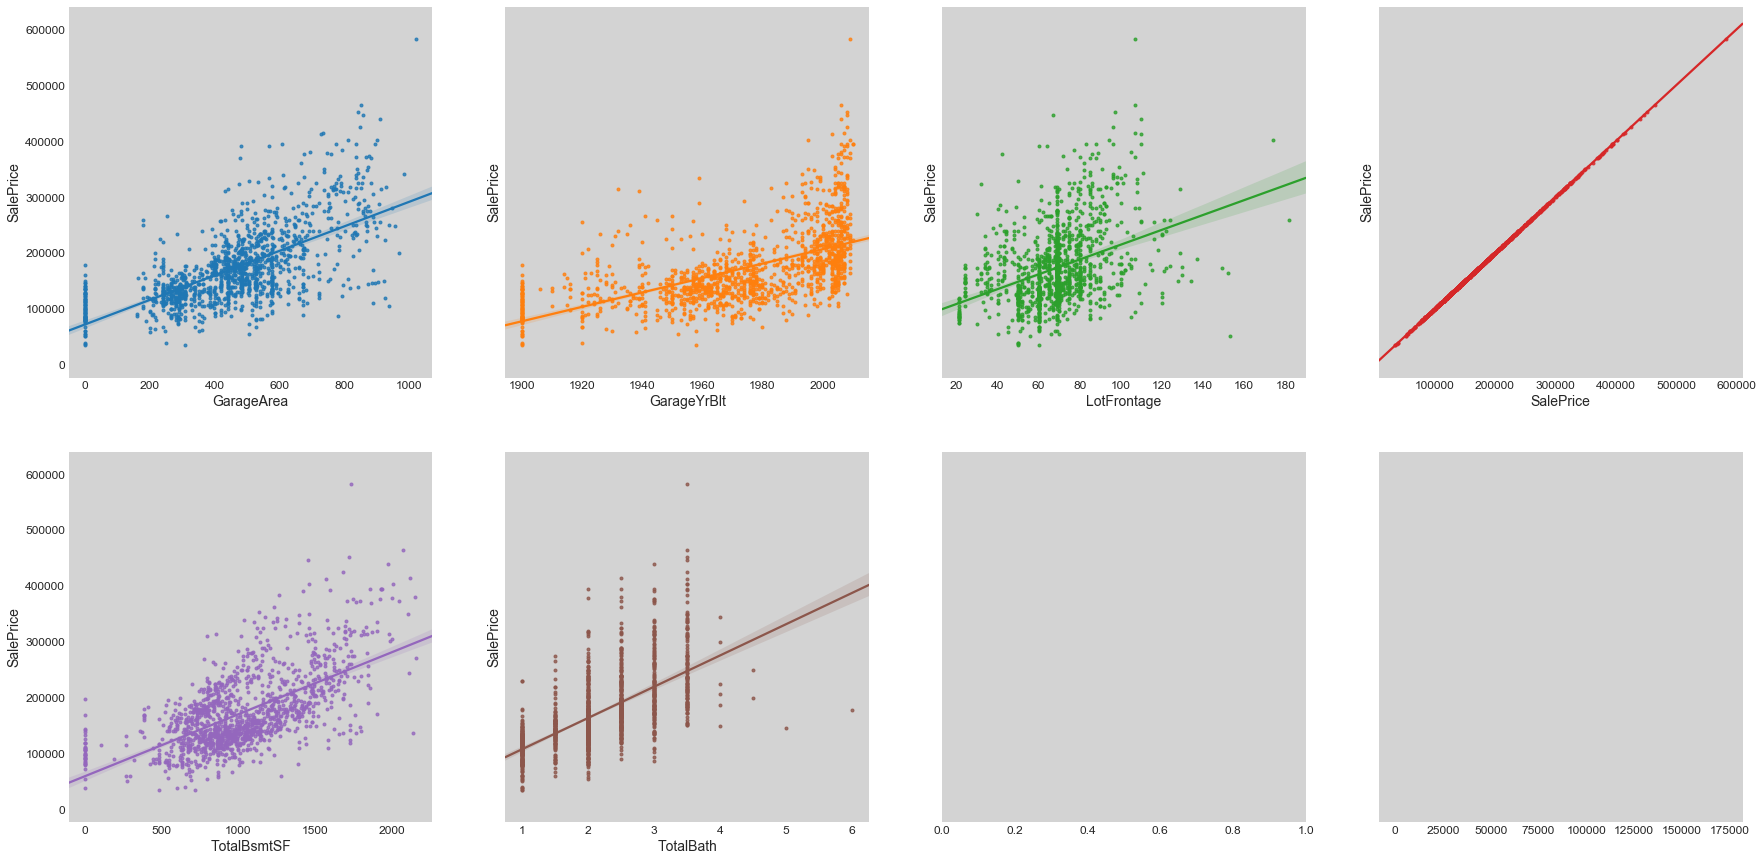

In [32]:
# let us see how remaining number columns look against 'SalePrice', which is target variable of this exercise.
f, axes = plt.subplots(2,4, figsize = (30, 15), sharey=True)
for i, col_name in enumerate(comb_data.select_dtypes(include=['float64']).columns):
    row = i // 4
    col = i % 4
    ax_curr = axes[row, col]
    sns.regplot(x=col_name, y='SalePrice', data=comb_data, scatter=True, marker = '.', ax = ax_curr)
plt.show()

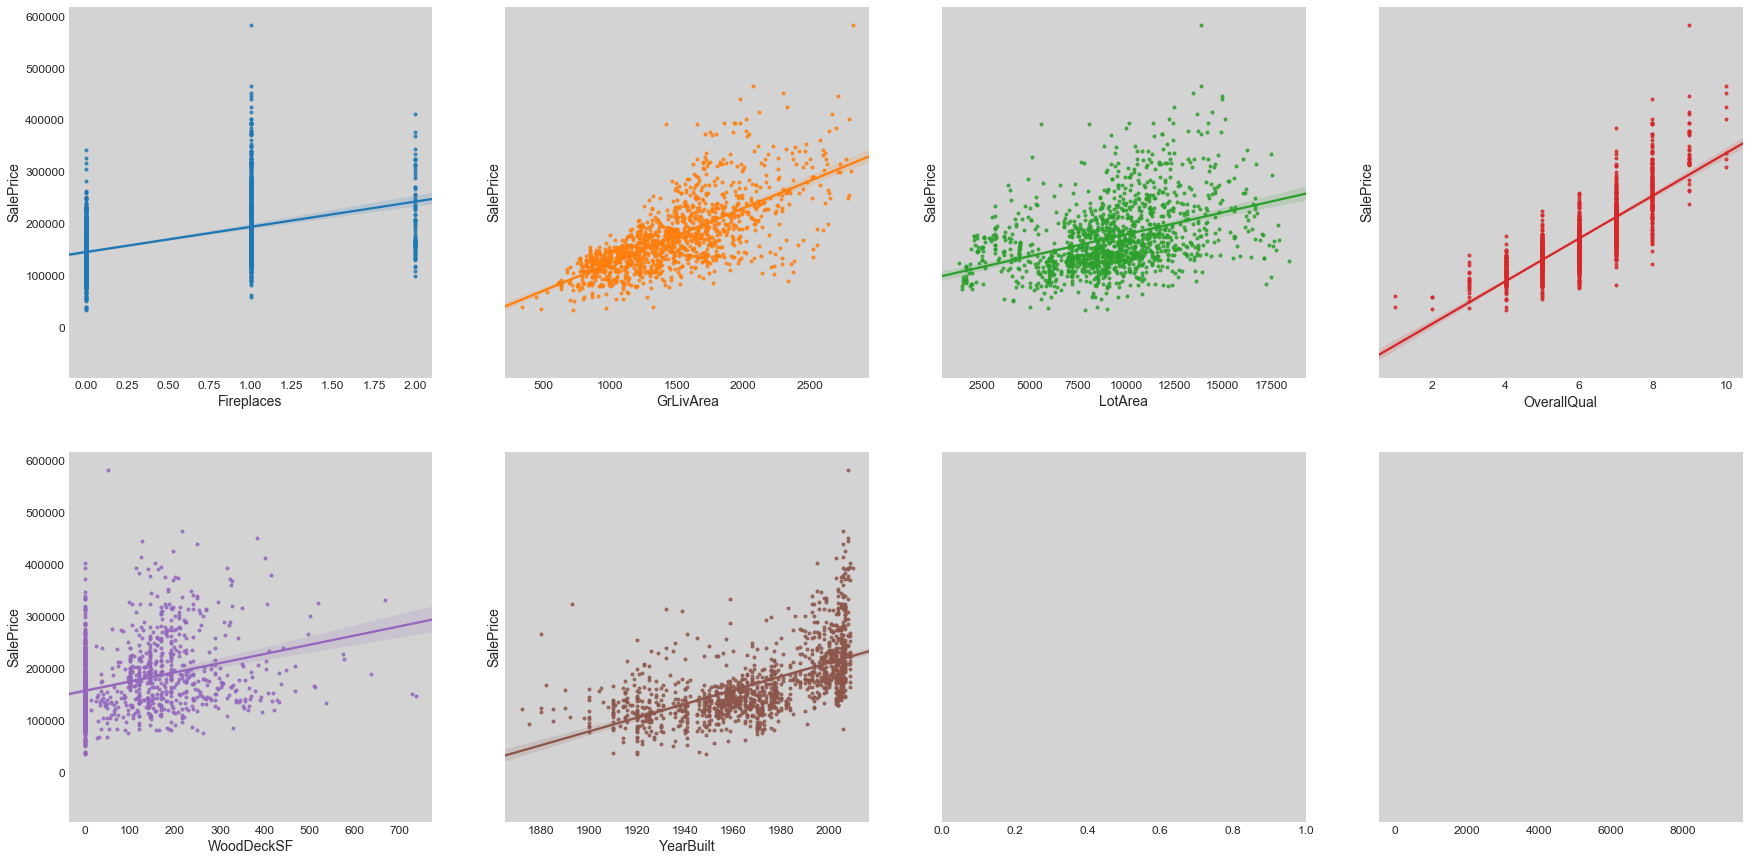

In [33]:
f, axes = plt.subplots(2,4, figsize = (30, 15), sharey=True)
for i, col_name in enumerate(comb_data.select_dtypes(include=['int64']).columns):
    row = i // 4
    col = i % 4
    ax_curr = axes[row, col]
    sns.regplot(x=col_name, y='SalePrice', data=comb_data, scatter=True, marker = '.', ax = ax_curr)
plt.show()

In [34]:
# Flush categories with 0 values in memory after dropping row
for column_name in comb_data.select_dtypes(include=['category']).columns:
    comb_data[column_name] = comb_data[column_name].astype('object')
    
# Change categorical columns to category data type [By default, Pandas converted these columns to 'Object']
for column_name in comb_data.select_dtypes(include=['object']).columns:
    comb_data[column_name] = comb_data[column_name].astype('category') 

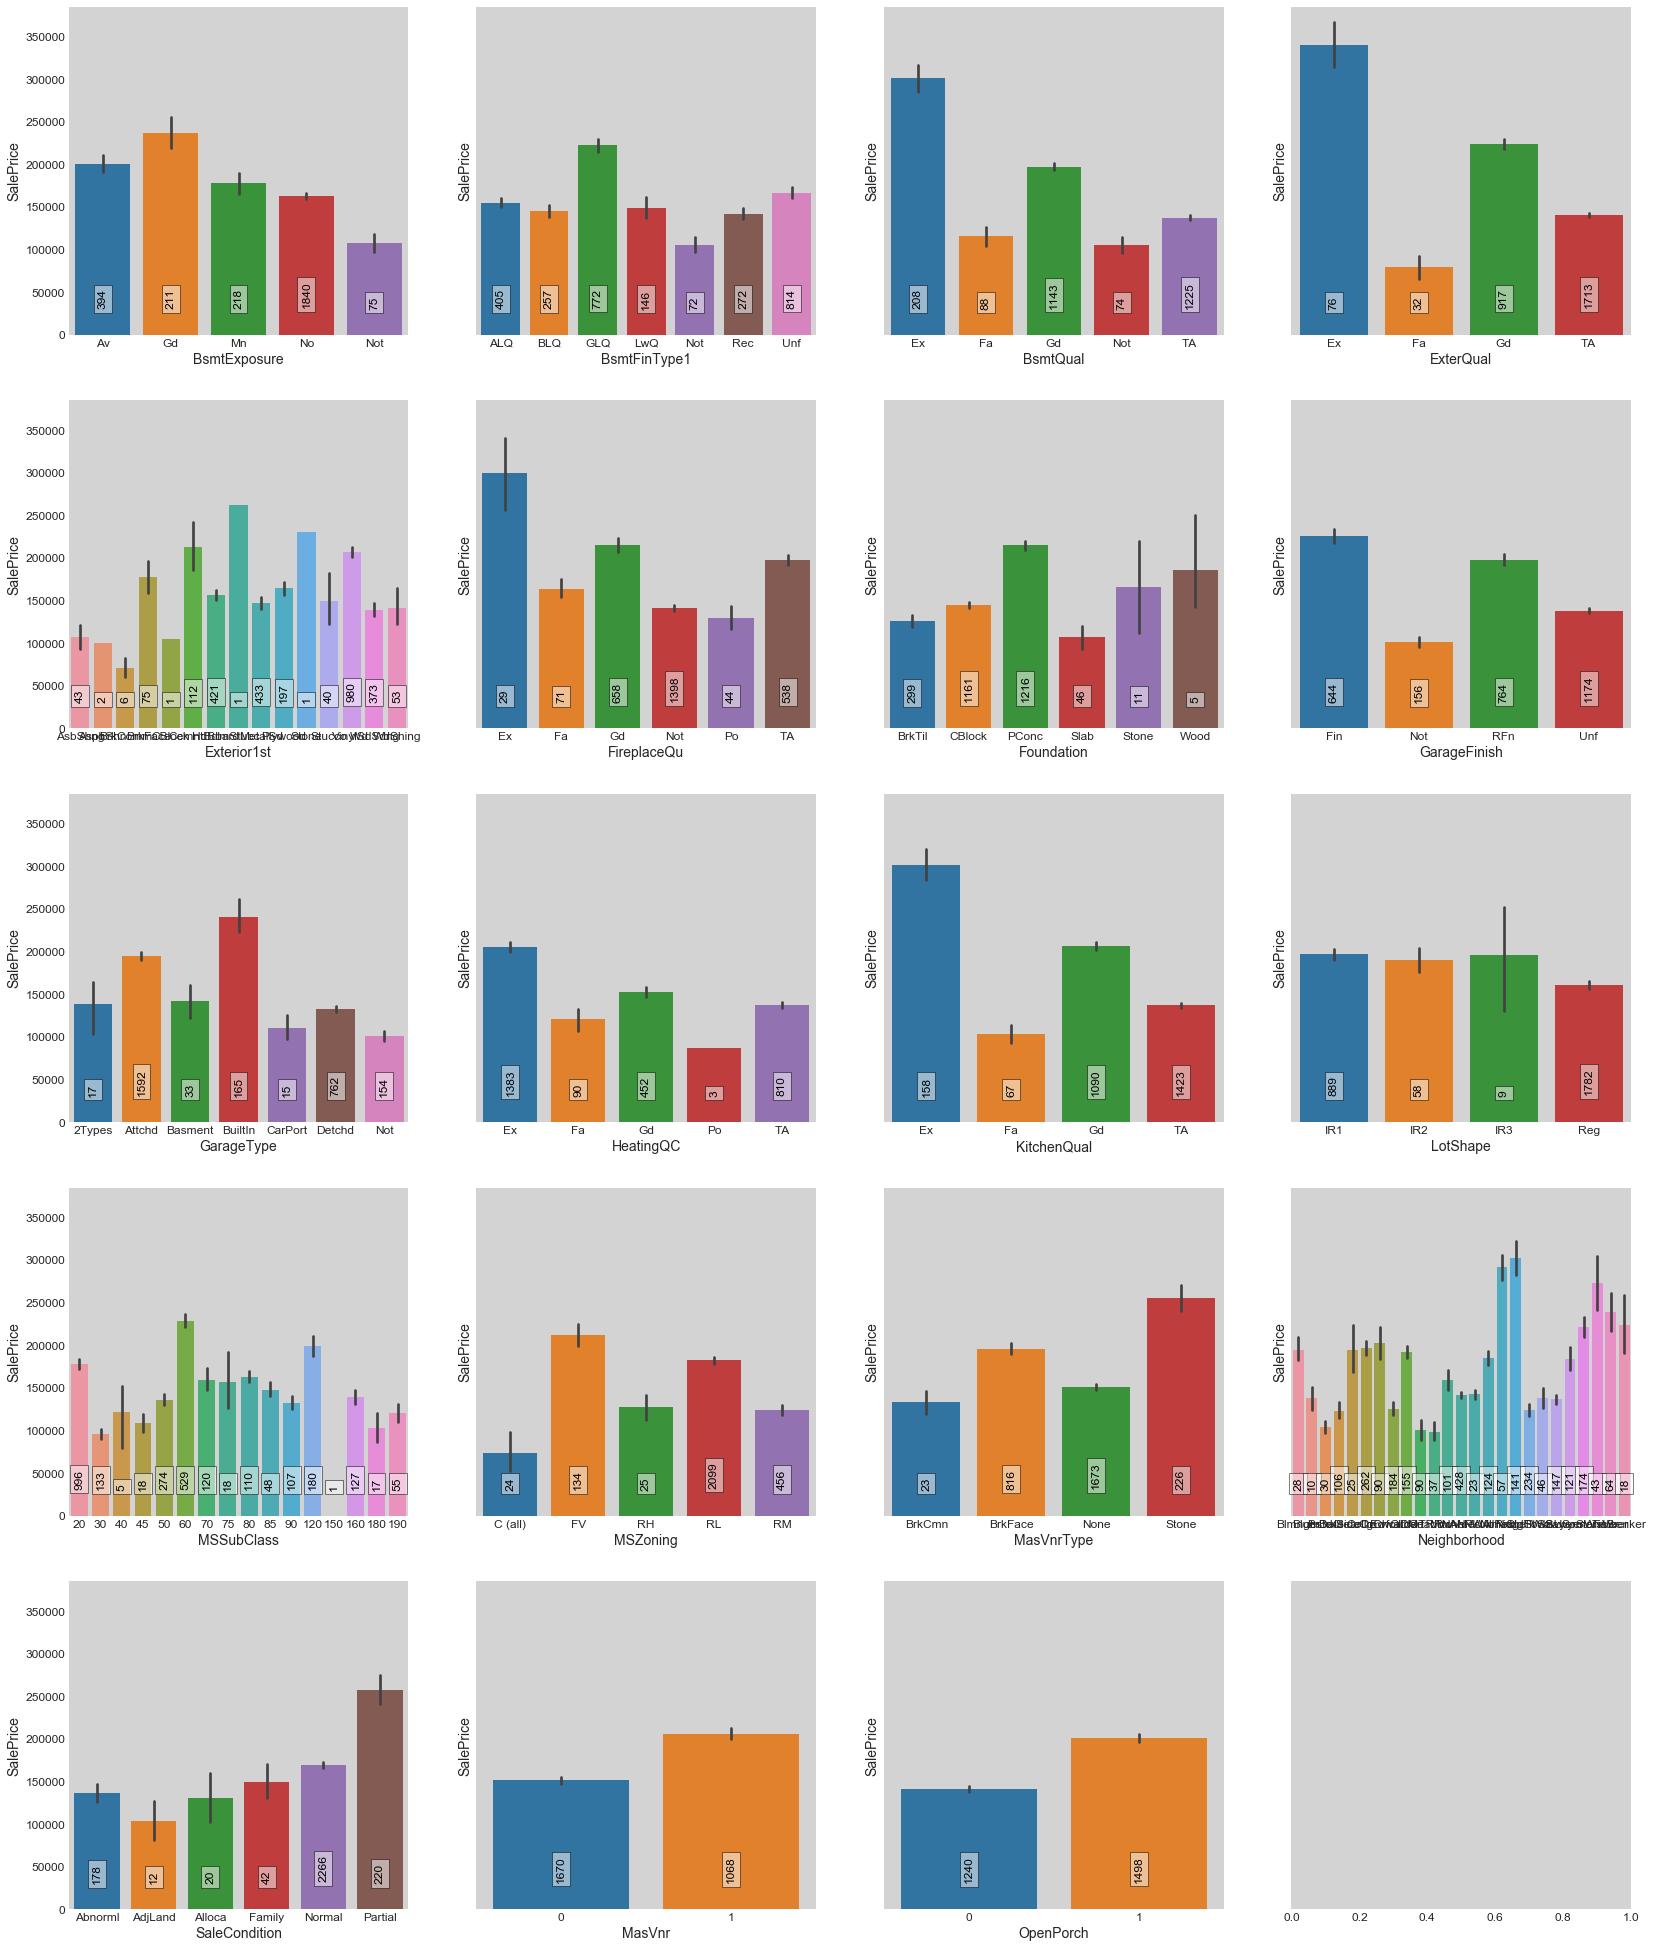

In [35]:
# Plot categorical variables Barplot with Mean 'SalePrice' on Y axis and count of observations in each category [Shown in box]
f, axes = plt.subplots(5,4, figsize = (28, 35), sharey=True)
for i, col_name in enumerate(comb_data.select_dtypes(include=['category']).columns):
    row = i // 4
    col = i % 4
    ax_curr = axes[row, col]    
    ax = sns.countplot(x=col_name, data=comb_data, ax = ax_curr)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 30000, '{:1.0f}'.format(height), ha="center", va="bottom", size=12, color='black', bbox=dict(facecolor='white', alpha=0.5), rotation=90)
    sns.barplot(col_name, 'SalePrice', data=comb_data, ax = ax_curr)
plt.show()

In [36]:
# Caluculate assciation between 2 columns - Cramer's V score
for i in comb_data.select_dtypes(include=['category']).columns:
    col_1 = i
    for j in comb_data.select_dtypes(include=['category']).columns:
        col_2 = j
        if col_1 == col_2:
            break
        confusion_matrix = pd.crosstab(comb_data[col_1], comb_data[col_2])
        chi2 = ss.chi2_contingency(confusion_matrix)[0] # import scipy.stats as ss
        n = confusion_matrix.sum().sum()
        phi2 = chi2/n
        r,k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        Cramer_V = np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
        if Cramer_V > 0.7:
            print("The Cramer's V score bettween " + col_1 + " and " + col_2 + " is : " + str(Cramer_V))
        result = Cramer_V

The Cramer's V score bettween MasVnr and MasVnrType is : 0.992721076955


*No Result above means no combination of two columns has Cramer's V score < 0.7*

In [37]:
# Drop more columns as per final analysis
comb_data = comb_data.drop(['MasVnr'], axis=1)

### Step 5 - Prepare the data for Machine Learning algorithms

##### Create DataFrames, Process Data, Transform Data for ML models

In [38]:
# Create independent variables dataframe
X_train = train_data
X_test = test_data

In [39]:
# Create new columns, OpenPorch - Y or N
X_train['OpenPorch'] = np.where(X_train['OpenPorchSF'] == 0, 0, 1)

X_test['OpenPorch'] = np.where(X_test['OpenPorchSF'] == 0, 0, 1)

# Create another column of Total bathrooms
X_train['TotalBath'] = pd.to_numeric(X_train['BsmtFullBath'] + X_train['BsmtHalfBath']*0.5 + X_train['FullBath'] + X_train['HalfBath']*0.5)

X_test['TotalBath'] = pd.to_numeric(X_test['BsmtFullBath'] + X_test['BsmtHalfBath']*0.5 + X_test['FullBath'] + X_test['HalfBath']*0.5)

In [40]:
# Drop unnecessary columns, these columns won't be useful in analysis and prediction
X_train = X_train.drop(['3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'EnclosedPorch', 'KitchenAbvGr', 'LowQualFinSF', 'MiscVal', 'PoolArea', 'ScreenPorch',\
'BsmtUnfSF', 'Id', 'MoSold', 'OverallCond', 'YearRemodAdd', 'YrSold', 'BedroomAbvGr', 'BsmtFullBath',  'GarageCars', \
'TotRmsAbvGrd', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'Alley', 'BldgType', 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'Condition1', 'Condition2',\
'Electrical', 'Fence', 'ExterCond', 'Functional', 'GarageCond', 'GarageQual', 'Heating', 'LotConfig', 'LandContour', 'LandSlope',\
'MiscFeature', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleType', 'Street', 'Utilities', 'Exterior2nd', 'HouseStyle',\
'MasVnrArea', 'OpenPorchSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)

X_test = X_test.drop(['3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'EnclosedPorch', 'KitchenAbvGr', 'LowQualFinSF', 'MiscVal', 'PoolArea', 'ScreenPorch',\
'BsmtUnfSF', 'Id', 'MoSold', 'OverallCond', 'YearRemodAdd', 'YrSold', 'BedroomAbvGr', 'BsmtFullBath',  'GarageCars',\
'TotRmsAbvGrd', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'Alley', 'BldgType', 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'Condition1', 'Condition2',\
'Electrical', 'Fence', 'ExterCond', 'Functional', 'GarageCond', 'GarageQual', 'Heating', 'LotConfig', 'LandContour', 'LandSlope',\
'MiscFeature', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleType', 'Street', 'Utilities', 'Exterior2nd', 'HouseStyle',\
'MasVnrArea', 'OpenPorchSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)

In [41]:
# 'Not' for 'NA'
for column_name in ['BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'FireplaceQu', 'GarageType', 'GarageFinish']:
    X_train[column_name].fillna('Not', inplace=True)
    
for column_name in ['BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'FireplaceQu', 'GarageType', 'GarageFinish']:
    X_test[column_name].fillna('Not', inplace=True)
    
# With most frequent values values
for column_name in ['GarageArea', 'TotalBsmtSF', 'MSZoning', 'Exterior1st', 'MasVnrType', 'KitchenQual', 'TotalBath']:
    X_train[column_name].fillna(X_train[column_name].value_counts().index[0], inplace=True)
    
for column_name in ['GarageArea', 'TotalBsmtSF', 'MSZoning', 'Exterior1st', 'MasVnrType', 'KitchenQual', 'TotalBath']:
    X_test[column_name].fillna(X_test[column_name].value_counts().index[0], inplace=True)
    
# Find stats of remaining missing data
print(X_train[['GarageYrBlt', 'LotFrontage']].describe().transpose())
print("-------------Count of null values in X_train Data------------------")
print(X_train.loc[:, X_train.isnull().any()].isnull().sum())

# Find stats of remaining missing data
print(X_test[['GarageYrBlt', 'LotFrontage']].describe().transpose())
print("-------------Count of null values in X_test Data------------------")
print(X_test.loc[:, X_test.isnull().any()].isnull().sum())

# Fill null 'GarageYrBlt' values with 1900.
X_train['GarageYrBlt'].fillna(1900, inplace=True)

X_test['GarageYrBlt'].fillna(1900, inplace=True)

# Fill missing 'LotFrontage' with random numbers
X_train.LotFrontage[np.isnan(X_train.LotFrontage)] = round(X_train['LotFrontage'].mean(),0)
X_test.LotFrontage[np.isnan(X_test.LotFrontage)] = round(X_test['LotFrontage'].mean(),0)


# Find stats of remaining missing data
print(X_test[['GarageYrBlt', 'LotFrontage']].describe().transpose())
print("-------------Count of null values in X_test Data------------------")
print(X_test.loc[:, X_test.isnull().any()].isnull().sum())

              count         mean        std     min     25%     50%     75%  \
GarageYrBlt  1379.0  1978.506164  24.689725  1900.0  1961.0  1980.0  2002.0   
LotFrontage  1201.0    70.049958  24.284752    21.0    59.0    69.0    80.0   

                max  
GarageYrBlt  2010.0  
LotFrontage   313.0  
-------------Count of null values in X_train Data------------------
LotFrontage    259
GarageYrBlt     81
dtype: int64
              count         mean        std     min     25%     50%     75%  \
GarageYrBlt  1381.0  1977.721217  26.431175  1895.0  1959.0  1979.0  2002.0   
LotFrontage  1232.0    68.580357  22.376841    21.0    58.0    67.0    80.0   

                max  
GarageYrBlt  2207.0  
LotFrontage   200.0  
-------------Count of null values in X_test Data------------------
LotFrontage    227
GarageYrBlt     78
dtype: int64
              count         mean        std     min     25%     50%     75%  \
GarageYrBlt  1459.0  1973.566141  31.098480  1895.0  1956.0  1977.0  2001.0 

**Find and delete rows with outlier data**

In [42]:
# Drop rows with outlier data
# [change if required] columns_for_outliers = ['YearBuilt', 'GrLivArea', 'TotalBsmtSF', 'Fireplaces', 'GarageArea', 'LotArea'] 
outliers_iqr(X_train, columns_for_outliers)
print('Total ' + str(X_train.Outlier.sum()) + ' rows with outliers from X_train were deleted')
X_train = X_train[X_train.Outlier != 1]
X_train = X_train.drop(['Outlier'], axis=1)

Total 97 rows with outliers from X_train were deleted


In [43]:
# Drop rows with outlier data
# Delete more rows from 'LotFrontage' outliers
X_train = X_train[X_train.LotFrontage < 130]

In [44]:
# Create dependent variable dataframe
y_train = np.log(X_train.SalePrice)
X_train = X_train.drop(['SalePrice'], axis=1)
y_train.shape

(1354,)

In [45]:
# Create Id dataframes for train and test data
train_id = train_data.iloc[:, 0]
test_id = test_data.iloc[:, 0]

print(train_id.head())
print(test_id.head())

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64
0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64


In [46]:
# Change to category data type
for column_name in X_train.select_dtypes(include=['object']).columns:
    X_train[column_name] = X_train[column_name].astype('category')
    
for column_name in X_test.select_dtypes(include=['object']).columns:
    X_test[column_name] = X_test[column_name].astype('category')
    
# Change categorical columns to category data type
X_train['MSSubClass'] = X_train['MSSubClass'].astype('category')
X_test['MSSubClass'] = X_test['MSSubClass'].astype('category')

In [47]:
# Transform categorical features in to dummy variables
# Get the list of category columns
cat_col_names = X_train.select_dtypes(include=['category']).columns

X_train = pd.get_dummies(X_train, columns=cat_col_names, prefix=cat_col_names, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_col_names, prefix=cat_col_names, drop_first=True)

In [48]:
# Ensure dummy columns are created properly. By default, all categorical columns will change to numeric one. So no column with categorical data type will be left.  
print(X_train.select_dtypes(include=['category']).columns)
print(X_test.select_dtypes(include=['category']).columns)

Index([], dtype='object')
Index([], dtype='object')


In [49]:
# Check number of columns and name of columns match between X_train and X_test
print(X_train.shape)
print(X_test.shape)
print(set(X_train.columns) == set(X_test.columns))
print('--------columns present in X_train but not in X_test-------')
missing_col_tt = [i for i in list(X_train) if i not in list(X_test)]
print(missing_col_tt)
print('--------columns present in X_test but not in X_train-------')
missing_col_tr = [i for i in list(X_test) if i not in list(X_train)]
print(missing_col_tr)

# Drop these columns and test again
X_train = X_train.drop(missing_col_tt, axis=1)
X_test = X_test.drop(missing_col_tr, axis=1)

print(X_train.shape)
print(X_test.shape)
print(set(X_train.columns) == set(X_test.columns))
print('--------columns present in X_train but not in X_test-------')
missing_col_tt = [i for i in list(X_train) if i not in list(X_test)]
print(missing_col_tt)
print('--------columns present in X_test but not in X_train-------')
missing_col_tr = [i for i in list(X_test) if i not in list(X_train)]
print(missing_col_tr)

(1354, 122)
(1459, 121)
False
--------columns present in X_train but not in X_test-------
['Exterior1st_ImStucc', 'Exterior1st_Stone']
--------columns present in X_test but not in X_train-------
['MSSubClass_150']
(1354, 120)
(1459, 120)
True
--------columns present in X_train but not in X_test-------
[]
--------columns present in X_test but not in X_train-------
[]


#### Feature Scaling

In [50]:
X_test

,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,...,GarageType_Detchd,GarageType_Not,GarageFinish_Not,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,11622,5,1961,882.0,896,0,1961.0,730.0,140,...,0,0,0,0,1,0,0,0,1,0
1,81.0,14267,6,1958,1329.0,1329,0,1958.0,312.0,393,...,0,0,0,0,1,0,0,0,1,0
2,74.0,13830,5,1997,928.0,1629,1,1997.0,482.0,212,...,0,0,0,0,0,0,0,0,1,0
3,78.0,9978,6,1998,926.0,1604,1,1998.0,470.0,360,...,0,0,0,0,0,0,0,0,1,0
4,43.0,5005,8,1992,1280.0,1280,0,1992.0,506.0,0,...,0,0,0,1,0,0,0,0,1,0
5,75.0,10000,6,1993,763.0,1655,1,1993.0,440.0,157,...,0,0,0,0,0,0,0,0,1,0
6,69.0,7980,6,1992,1168.0,1187,0,1992.0,420.0,483,...,0,0,0,0,0,0,0,0,1,0
7,63.0,8402,6,1998,789.0,1465,1,1998.0,393.0,0,...,0,0,0,0,0,0,0,0,1,0
8,85.0,10176,7,1990,1300.0,1341,1,1990.0,506.0,192,...,0,0,0,0,1,0,0,0,1,0
9,70.0,8400,4,1970,882.0,882,0,1970.0,525.0,240,...,0,0,0,0,0,0,0,0,1,0


In [51]:
# Apply Feature Scaling
fs = MaxAbsScaler()
X_train_fs = fs.fit_transform(X_train)
X_test_fs = fs.transform(X_test)
print(X_train_fs.shape)
print(X_test_fs.shape)
print(X_train_fs[:2,:6])
print(X_test_fs[:2,:6])

(1354, 120)
(1459, 120)
[[ 0.50387597  0.45799458  0.7         0.99651741  0.39666358  0.59006211]
 [ 0.62015504  0.5203252   0.6         0.98308458  0.58480074  0.43547274]]
[[ 0.62015504  0.6299187   0.5         0.97562189  0.40871177  0.30917874]
 [ 0.62790698  0.77327913  0.6         0.97412935  0.61584801  0.45859213]]


### Step 6 - Select and train a model 

#### Linear Regression

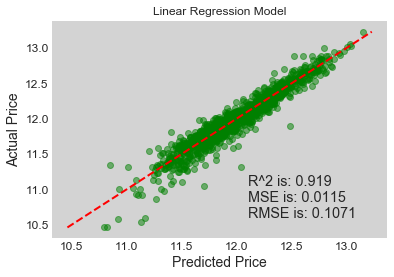

In [52]:
lr = LinearRegression()
model = lr.fit(X_train_fs, y_train)
predictions = model.predict(X_train_fs)
actual_values = y_train
R_square = model.score(X_train_fs, y_train)
MSE = mean_squared_error(y_train, predictions)
RMSE = np.sqrt(MSE)
plt.scatter(predictions, actual_values, alpha=.5, color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='r')
overlay = 'R^2 is: {:.3f}\nMSE is: {:.4f}\nRMSE is: {:.4f}'.format(R_square, MSE, RMSE)
plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
plt.show()

#### Cross Validation - Linear Regression

Best RMSE: 0.0995717579958
Mean RMSE: 0.12226255601
SD RMSE: 0.0156487711028


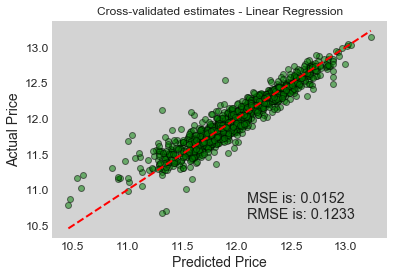

In [53]:
# Find cross-validation score
lr2 = LinearRegression()
scores = cross_val_score(estimator = lr2, X = X_train, y = y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Best RMSE:", scores.min())
    print("Mean RMSE:", scores.mean())
    print("SD RMSE:", scores.std())

display_scores(rmse_scores)

# Generate cross-validated estimates for each input data point
lr1 = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validation:
predictions = cross_val_predict(lr1, X_train, y_train, cv=10)

MSE = mean_squared_error(y_train, predictions)
RMSE = np.sqrt(MSE)

fig, ax = plt.subplots()
ax.scatter(y_train, predictions, alpha=.5, color='g', edgecolors=(0, 0, 0)) #alpha helps to show overlapping data
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='r')
overlay = 'MSE is: {:.4f}\nRMSE is: {:.4f}'.format(MSE, RMSE)
plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')

ax.set_xlabel('Predicted Price')
ax.set_ylabel('Actual Price')
plt.title('Cross-validated estimates - Linear Regression')
plt.show()

**Now, We will explore other models and learn other aspects of Machine Learning regression models.**

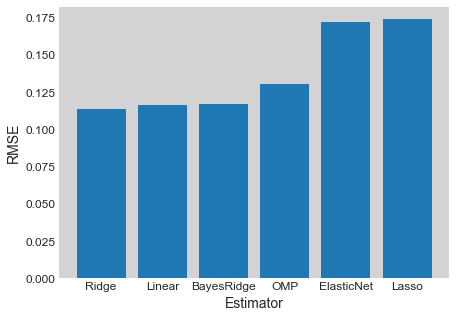

In [54]:
# Compare various linear regression algorithms
rs = 1
ests = [ LinearRegression(), Ridge(), Lasso(), ElasticNet(), BayesianRidge(), OrthogonalMatchingPursuit()]

ests_labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'BayesRidge', 'OMP'])
errvals = np.array([])

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

for e in ests:
    e.fit(X_tr, y_tr)
    this_err = mean_squared_error(y_val, e.predict(X_val))
    RMSE = np.sqrt(this_err)
    #print "got error %0.2f" % this_err
    errvals = np.append(errvals, RMSE)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('RMSE')
plt.show()

*Ridge and Bayesian Ridge performaed a little bit bette than vanilla linear regression*

#### Cross Validation - Linear Regression (Bayesian Ridge)

Best RMSE: 0.101276841759
Mean RMSE: 0.120867760482
SD RMSE: 0.0136623446687


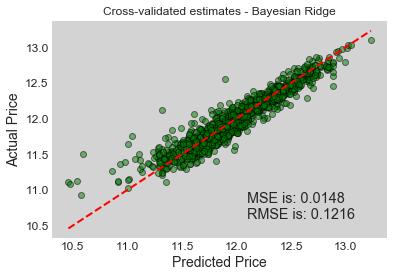

In [55]:
# Generate cross-validated estimates for each input data point
from sklearn.model_selection import cross_val_predict
BRidge = BayesianRidge()

# cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validation:
predictions = cross_val_predict(BRidge, X_train, y_train, cv=10)

MSE = mean_squared_error(y_train, predictions)
RMSE = np.sqrt(MSE)

fig, ax = plt.subplots()
ax.scatter(y_train, predictions, alpha=.5, color='g', edgecolors=(0, 0, 0)) #alpha helps to show overlapping data
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='r')
overlay = 'MSE is: {:.4f}\nRMSE is: {:.4f}'.format(MSE, RMSE)
plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')

ax.set_xlabel('Predicted Price')
ax.set_ylabel('Actual Price')
plt.title('Cross-validated estimates - Bayesian Ridge')


# Find cross-validation score
scores = cross_val_score(estimator = BRidge, X = X_train, y = y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Best RMSE:", scores.min())
    print("Mean RMSE:", scores.mean())
    print("SD RMSE:", scores.std())

display_scores(rmse_scores)
plt.show()

*Could not beat the mean RMSE of Linear Regression*

#### Ridge Regression or Tikhonov regularization

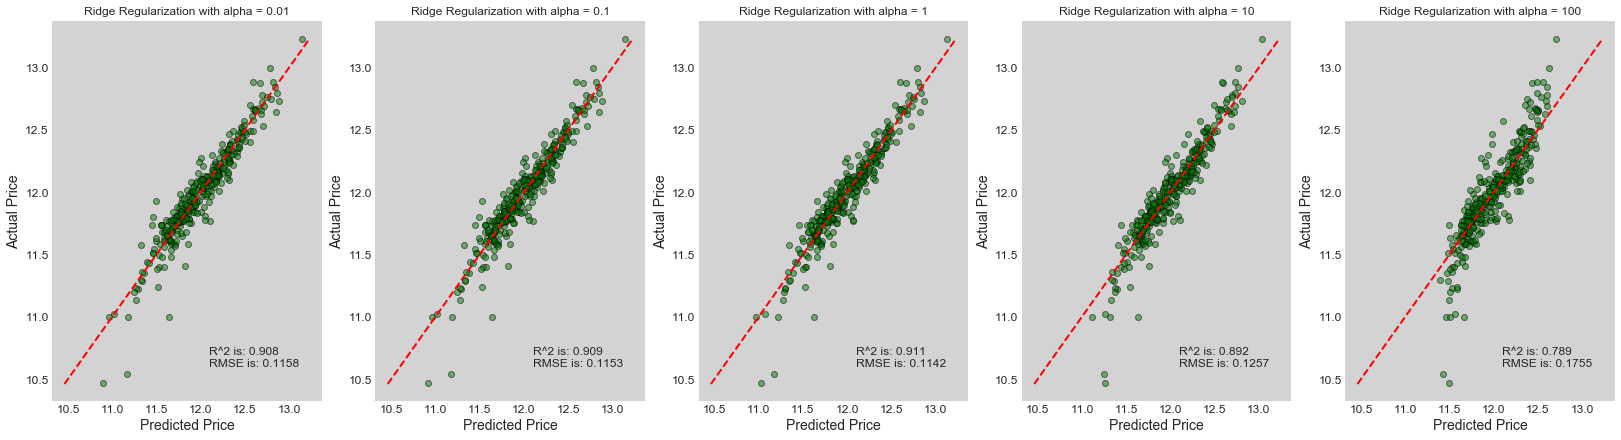

In [56]:
# Train and Validation set split by model_selection
X_tr, X_val, y_tr, y_val = train_test_split(X_train_fs, y_train, test_size=0.25, random_state=42)
plt.figure(figsize=(28, 7))
for i in range (-2, 3):
    alpha = 10**i
    rm = Ridge(alpha=alpha)
    ridge_model = rm.fit(X_tr, y_tr)
    preds_ridge = ridge_model.predict(X_val)
    R_square = ridge_model.score(X_val, y_val)
    MSE = mean_squared_error(y_val, preds_ridge)
    RMSE = np.sqrt(MSE)
    
    plt.subplot(1, 5, i+3)
    plt.scatter(preds_ridge, y_val, alpha=.5, color='g', edgecolors=(0, 0, 0))
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {:.3f}\nRMSE is: {:.4f}'.format(R_square, RMSE)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='r')
    plt.annotate(s=overlay,xy=(12.1,10.6),size='large')
plt.show()

*Increasing alpha did improve the score. Which means there is overfitting happening above.
It also explains why my score on Kaggle was worse than Linear Regression score.*

#### Polynomial Regression

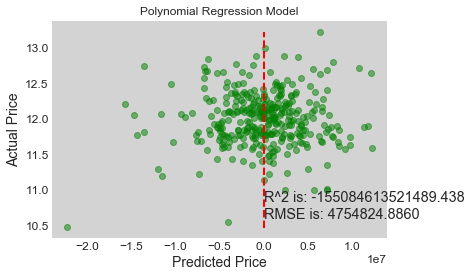

In [57]:
pr = PolynomialFeatures(degree = 2)
X_poly = pr.fit_transform(X_train_fs)

# Train and Validation set split by model_selection
X_tr, X_val, y_tr, y_val = train_test_split(X_poly, y_train, test_size=0.25, random_state=42)

lr = LinearRegression()
model = lr.fit(X_tr, y_tr)
predictions = model.predict(X_val)
actual_values = y_val

R_square = model.score(X_val, y_val)
MSE = mean_squared_error(y_val, predictions)
RMSE = np.sqrt(MSE)

plt.scatter(predictions, actual_values, alpha=.5, color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Polynomial Regression Model')
overlay = 'R^2 is: {:.3f}\nRMSE is: {:.4f}'.format(R_square, RMSE)
plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='r')
plt.show()

*Very bad score. There is not much non-linear relationship between features and target*

#### Compare Machine Learning Regression models

In [58]:
reg_names = ["Linear Regression", "Ridge Regularization", "Nearest Neighbors", "Gaussian Process",
         "Decision Tree", "Neural Net", "Random Forest", "XGBoost", "Gradient Boost", "Extra Tree", "AdaBoost",
         "Bayesian Ridge", "Bagging"]

reg_func = [LinearRegression(normalize=True),
    Ridge(alpha=0.01),
    KNeighborsRegressor(n_neighbors=5),
    GaussianProcessRegressor(alpha =0.01, n_restarts_optimizer=9, normalize_y=True, ),
    DecisionTreeRegressor(max_depth=8),
    MLPRegressor(),
    RandomForestRegressor(n_estimators=410, max_depth=8),
    XGBRegressor(max_depth = 8, n_estimators = 16),
    GradientBoostingRegressor(n_estimators = 500, max_depth = 8, min_samples_split = 2, learning_rate = 0.01, loss ='ls'),
    ExtraTreesRegressor(n_estimators=200, max_depth=8, criterion='mae'),
    AdaBoostRegressor(DecisionTreeRegressor(max_depth=8)),
    BayesianRidge(),
    BaggingRegressor(RandomForestRegressor(n_estimators=410, max_depth=8))]

np.random.seed(42)
                     
# iterate over regressors
print('       Model     --->     Best RMSE  --->   Mean RMSE  --->  SD RMSE')
i=1
for name, regr in zip(reg_names, reg_func):
    mse_scores = cross_val_score(estimator = regr, X = X_train, y = y_train, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-mse_scores)
    best_rmse = "{:.3f}".format(rmse_scores.min())
    mean_rmse = "{:.3f}".format(rmse_scores.mean())
    sd_rmse = "{:.3f}".format(rmse_scores.std())
    print(i,' - ', name, ' --->  ',  best_rmse, ' --->  ', mean_rmse, '  --->  ', sd_rmse)
    i += 1

       Model     --->     Best RMSE  --->   Mean RMSE  --->  SD RMSE
1  -  Linear Regression  --->   0.114  --->   4102143682.748   --->   8013061558.141
2  -  Ridge Regularization  --->   0.114  --->   0.124   --->   0.007
3  -  Nearest Neighbors  --->   0.199  --->   0.215   --->   0.008
4  -  Gaussian Process  --->   0.359  --->   0.375   --->   0.019
5  -  Decision Tree  --->   0.183  --->   0.198   --->   0.008
6  -  Neural Net  --->   2.863  --->   4.381   --->   0.999
7  -  Random Forest  --->   0.136  --->   0.143   --->   0.006
8  -  XGBoost  --->   2.134  --->   2.151   --->   0.011
9  -  Gradient Boost  --->   0.134  --->   0.147   --->   0.007
10  -  Extra Tree  --->   0.139  --->   0.148   --->   0.008
11  -  AdaBoost  --->   0.138  --->   0.140   --->   0.003
12  -  Bayesian Ridge  --->   0.114  --->   0.121   --->   0.006
13  -  Bagging  --->   0.135  --->   0.141   --->   0.005


*Cross-val mean RMSE is very close to the mean RMSE of Linear Regression*